In [3]:
import os, xarray as xr, numpy as np, pandas as pd, dask, random, netCDF4
import cartopy.crs as ccrs, matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

from datetime import datetime as dt, timedelta
import datetime, time
import h5netcdf
import random

import importlib
import matplotlib.patches as mpatches
import gc
from matplotlib.gridspec import GridSpec
dask.config.set({"array.slicing.split_large_chunks": False})
import sys
sys.path.insert(1, '/home/data/lab_hardik/udf/')

import composite_funcs
import grad_funcs
importlib.reload(composite_funcs)
from composite_funcs import *
from grad_funcs import *

ERROR 1: PROJ: proj_create_from_database: Open of /home/lab_hardik/my_conda/share/proj failed


[30. 60. 90.]
[10. 30. 50.]
$\mathregular{\mathcal{S}'_{x}}$
["$u'$", "$v'$", "$w'$", "$\\mathcal{S}'_x$", "$\\mathcal{S}'_y$", "$\\mathcal{S}'_z$", '${u̅}$', '${v̅}$', '${w̅}$', '$\\mathcal{S}̅_x$', '$\\mathcal{S}̅_y$', '$\\mathcal{S}̅_z$']
dict_values(["$u'$$\\mathcal{S}'_x$", "$v'$$\\mathcal{S}'_y$", "$w'$$\\mathcal{S}'_z$", "$u'$$\\mathcal{S}̅_x$", "$v'$$\\mathcal{S}̅_y$", "$w'$$\\mathcal{S}̅_z$", "${u̅}$$\\mathcal{S}'_x$", "${v̅}$$\\mathcal{S}'_y$", "${w̅}$$\\mathcal{S}'_z$", '${u̅}$$\\mathcal{S}̅_x$', '${v̅}$$\\mathcal{S}̅_y$', '${w̅}$$\\mathcal{S}̅_z$'])
["$v'$$\\mathcal{S}̅_y$", "$w'$$\\mathcal{S}̅_z$", "${u̅}$$\\mathcal{S}'_x$"]
["$u'$$\\mathcal{S}'_x$", "$v'$$\\mathcal{S}'_y$", "$w'$$\\mathcal{S}'_z$"]
['${u̅}$$\\mathcal{S}̅_x$', '${v̅}$$\\mathcal{S}̅_y$', '${w̅}$$\\mathcal{S}̅_z$']
["$u'$$\\mathcal{S}̅_x$", "${v̅}$$\\mathcal{S}'_y$", "${w̅}$$\\mathcal{S}'_z$"]
[30. 60. 90.]
[10. 30. 50.]


In [4]:
# tst = xr.open_dataset('/home/data/lab_hardik/data/ERA5/climatology/t_3D/dly_clmtlgy_stdPlevs_prmnsn_temperature_1980_2022_wFeb.nc')
# tst.close()

importlib.reload(composite_funcs)
from composite_funcs import *

[30. 60. 90.]
[10. 30. 50.]


In [5]:
dir_csv = '/home/data/lab_hardik/heatwaves/ERA5/dtree_anoms/processed_files/'
# files = [s for s in os.listdir(dir_csv) if 'Apr' in s]
# # files.sort(key = os.path.getctime)
# files

In [6]:
os.chdir(dir_csv)

In [7]:
import variables
from variables import *

In [8]:
dir_plots = '/home/data/lab_hardik/heatwaves/ERA5/analyses/phase_relations/'

In [9]:
def plot_samples(ds, save_str = ''):
#     global fig, ax
    # num_plots = 10 if df.shape[0]>=10 else df.shape[0]
    # num_plots = 10 if len(ds.date)>=10 else len(ds.date)

    # num_plots = int(np.ceil(len(ds.date)/2)*2)

    num_plots = len(ds.date)

    nrow = int(np.ceil(num_plots/2))

    fig, ax = plt.subplots(
        nrow,2, figsize=(16, nrow*4), sharey=True, subplot_kw={'projection': ccrs.PlateCarree()}
    )

    for i in range(num_plots):
        r = bicol_panel_rownum(i)
        c = bicol_panel_colnum(i)
        print('rowunm',r)
        print('colnum',c)

        dt_str = str(ds.date.dt.date[i].data)

        tot_flx = df.loc[df['date'] == dt_str, 'Net_Adv'].values[0].round()
        dse_anom_Lag1 = df.loc[df['date'] == dt_str, 'dse_anom_Lag1'].values[0].round()

        da_plt = ds[dse_var].isel(date = i)#.mean(['date'])#.compute()
        da_cont = ds[z_var].isel(date = i)#.mean(['date'])#.compute()
        da_u = (ds[u_var]).isel(date = i)#.mean(['date'])#.compute()
        da_v = (ds[v_var]).isel(date = i)#.mean(['date'])#.compute()
        # da_u = ds['adv_flx_x'].mean(['date']).compute()
        # da_v = ds['adv_flx_y'].mean(['date']).compute()

        print('calling inner_composite() on i = ', i)
        # vmin = np.nan; vmax=np.nan
        inner_plot_composite(
            da_plt = da_plt, da_cont = da_cont, da_u = da_u, da_v = da_v, xmin=0, xmax=120, ymin=10, ymax=65, 
            cont_divisions=20, coarsen_pts=8,
            t_type = 'dse_anom',scale_quiv= 70, 
            i = r, j = c, ax=ax[r,c], 
            title_str = 'dse_anom_Lag1 = {}, dse_flx = {}, date = {}'\
            .format(dse_anom_Lag1, tot_flx, dt_str)
            )
    plt.tight_layout()
    
    if save_str != '':
        print('saving plot')
        plt.savefig(dir_plots + save_str)
        plt.close()
        

In [268]:
dat_dir = '/home/data/lab_hardik/heatwaves/ERA5/dtree_anoms/processed_files/'

# files = [s for s in os.listdir(dir_csv) if 'Apr_posbg_decay_nl_' in s]
# files = [s for s in os.listdir(dir_csv) if 'Apr_posbg_' in s]
# files = [s for s in os.listdir(dir_csv) if 'Apr_posbg_amplif_nlsat_' in s]
# files = [s for s in os.listdir(dir_csv) if 'Apr_posbg_amplif_full_yNL_' in s]
# files = [s for s in os.listdir(dir_csv) if 'Apr_posbg_decay_ql' in s]
# files = [s for s in os.listdir(dir_csv) if '_w_' in s and s.endswith('v.csv')]
# files = [s for s in os.listdir(dir_csv) if s.endswith('ws_small.csv')]
# files = [s for s in os.listdir(dir_csv) if s.startswith('prim_lrg') and s.endswith('small_ws.csv')]
# files = [s for s in os.listdir(dir_csv) if ('pos_ext_cycle' in s) and s.endswith('csv')]

# files = [s for s in os.listdir(dir_csv) if (s.startswith('prim_r1') or s.startswith('prim_r3')) and s.endswith('bg.csv')]
# files = [s for s in os.listdir(dir_csv) if (s.startswith('prim_r1') or s.startswith('prim_r3')) and s.endswith('bg.csv') and 'us_ip_vs' not in s]

# files = [s for s in os.listdir(dir_csv) if (s.startswith('prim_r2_1') or s.startswith('prim_r4_1')) and s.endswith('bg.csv')]
# files = [s for s in os.listdir(dir_csv) if s.startswith('Apr_posbg') or s.startswith('Apr_negbg')]
# files = [s for s in os.listdir(dir_csv) if s.startswith('Apr_posbg') or s.startswith('Apr_negbg') and 'bg1' not in s]

# files = [s for s in os.listdir(dat_dir) if s.startswith('Mar_') and 'v2' in s]
# files = [s for s in os.listdir(dat_dir) if 'lrg_ws_us_sml_vs' in s and 'Apr' in s]

files = [s for s in os.listdir(dat_dir) if s.startswith('Apr_pos') and 'v2' in s 
         and 'nl1' not in s and 'nl2' not in s
        and 'amplif_nl_xNL' not in s # this was from an old run
         and 'posbg2_decay_nl_xNL' not in s # posbg2 is included in posbg
        ] #+ ['Apr_posbg_decay_nlsat_yNL_v2.csv']

files = ["Apr_posbg_decay_nl2_yNL_v2.csv"]
# files = ['Apr_posbg_decay_nlsat_yNL_v2.csv']

# files = [s for s in os.listdir(dat_dir) if s.startswith('Apr_pos') and 'v2' in s 
#          and 'nl_' not in s # and 'nl2' not in s
#         and 'amplif_nl_xNL' not in s # this was from an old run
#          and 'posbg2_decay_nl_xNL' not in s # posbg2 is included in posbg
#         ]

# files = [s for s in os.listdir(dat_dir) if (('r1' in s) or ('r3' in s)) and 'Apr' in s]
# files = [s for s in os.listdir(dat_dir) if (('prim_r' in s) and ('bg' in s)) and 'Apr_' in s]

# files = [s for s in os.listdir(dat_dir) if s.startswith('Mar_posbg') and 'v2' in s]
# 
# files = [s for s in os.listdir(dir_csv) if s.startswith('Mar_posbg') ] # or s.startswith('Mar_negbg')

# files = [s for s in os.listdir(dat_dir) if s.startswith('Apr_negbg') and 'v2' in s 
#          and 'nl1' not in s and 'nl2' not in s
#         and 'amplif_nl_xNL' not in s # this was from an old run
#          and 'posbg2_decay_nl_xNL' not in s # posbg2 is included in posbg
#         ]

# files.sort(key = os.path.getctime)
# files.sort(key = lambda s: s.split('_')[1] + s.split('_')[2] + s.split('_')[3] + s.split('_')[4])
files.sort(key = lambda s: (s.split('_')[1], s.split('_')[2], s.split('_')[3], s.split('_')[4]))
print(len(files))
files

1


['Apr_posbg_decay_nl2_yNL_v2.csv']

In [139]:
# files = ["Apr_posbg_decay_nl2_yNL_v2.csv", "Apr_posbg_decay_nl1_yNL_v2.csv", "Apr_posbg_decay_ql_xyip_v2.csv"]
# files

In [269]:
# df = pd.read_csv(files[1], parse_dates=['date'])
# df.shape

# df.columns

# del ds_brnch, ds_z_comp, ds_t_comp, ds_v_comp, ds_u_comp
# gc.collect()

gc.collect()
files.sort(key = lambda s: (s.split('_')[1], s.split('_')[2], s.split('_')[3], ))#.sort(key = lambda s: s.split('_')[2])
files

['Apr_posbg_decay_nl2_yNL_v2.csv']

## New plotting section

In [270]:
dir_data = '/home/data/lab_hardik/heatwaves/ERA5/analyses/phase_relations/data/'

In [271]:
i=0
df = pd.read_csv(dir_csv + files[i], parse_dates=['date'])
print(df.shape)
print(files[i])
df.columns

(6, 21)
Apr_posbg_decay_nl2_yNL_v2.csv


Index(['date', '$u'$$\mathcal{S}'_x$', '$v'$$\mathcal{S}'_y$',
       '$w'$$\mathcal{S}'_z$', '$v'$$\mathcal{S}̅_y$', '$w'$$\mathcal{S}̅_z$',
       '${u̅}$$\mathcal{S}'_x$', 'T_main', 'NL_sum', 'x_contrib_NL',
       'y_contrib_NL', 'z_contrib_NL', 'Net_Adv', '$\mathcal{S}'_y$',
       'dse_anom', 'dse_anom_Lag1', '$u'$', '$v'$', '$w'$', '$\mathcal{S}'_x$',
       '$\mathcal{S}'_z$'],
      dtype='object')

In [272]:
dir_data

'/home/data/lab_hardik/heatwaves/ERA5/analyses/phase_relations/data/'

In [273]:
importlib.reload(grad_funcs)
from grad_funcs import *

importlib.reload(composite_funcs)
from composite_funcs import *


In [274]:
len(files)

1

In [275]:
dir_plots

'/home/data/lab_hardik/heatwaves/ERA5/analyses/phase_relations/'

In [276]:
dat_dir

'/home/data/lab_hardik/heatwaves/ERA5/dtree_anoms/processed_files/'

In [277]:
dir_data

'/home/data/lab_hardik/heatwaves/ERA5/analyses/phase_relations/data/'

In [278]:
os.getcwd()

'/home/data/lab_hardik/heatwaves/ERA5/analyses/phase_relations/data'

In [279]:
dir_csv

'/home/data/lab_hardik/heatwaves/ERA5/dtree_anoms/processed_files/'

In [280]:
for file in files:
    print(file)
    print("out of", pd.read_csv(dat_dir + file, parse_dates=['date']).shape[0], "nc files,")
    existing_nc_lst = [s for s in os.listdir(dir_data) if 
                      starts_with_substring_and_number(s, file.replace('.csv', '') + '_') 
                     and s.endswith('_2Dave.nc')
    ]
    print(len(existing_nc_lst), 'files exist')


Apr_posbg_decay_nl2_yNL_v2.csv
out of 6 nc files,
6 files exist


In [281]:
file = files[0]
print(file)

Apr_posbg_decay_nl2_yNL_v2.csv


In [282]:
two_day_averaging = True

In [283]:
df = pd.read_csv(dir_csv + file, parse_dates=['date'])
print(df.shape)

if two_day_averaging == True:
    nc_lst = [s for s in os.listdir(dir_data) if 
              starts_with_substring_and_number(s, file.replace('.csv', '') + '_') 
             and s.endswith('_2Dave.nc')]
else:
    nc_lst = [s for s in os.listdir(dir_data) if starts_with_substring_and_number(s, file.replace('.csv', '') + '_')]

print('len(nc_lst)', len(nc_lst))


#     if df.shape[0] <= 2:
#         print('index', i, 'has <=2 rows')
#         continue

#     if len(nc_lst) != df.shape[0]:
#         print('all dates\' nc files not available for index', i)
#         continue

if 'Net_Adv' not in df.columns:
    df['Net_Adv'] = df['adv_recon_2Dave'].copy()

os.chdir(dir_data)
def preprocess(ds):
    return ds.expand_dims('date')

ds_brnch = xr.open_mfdataset(nc_lst, preprocess=preprocess)
print('ds_brnch', ds_brnch.dims)

flux_dts = df.date.to_list()
print(len(flux_dts))


(6, 21)
len(nc_lst) 6
ds_brnch Frozen({'date': 6, 'latitude': 201, 'longitude': 481})
6


0 Apr_posbg_decay_nl2_yNL_v2.csv
(6, 21)
len(nc_lst) 6
ds_brnch Frozen({'date': 6, 'latitude': 201, 'longitude': 481})
6
vmin =  <xarray.DataArray 'dse_anom' ()>
array(-4898.96676298)
Coordinates:
    quantile  float64 0.0
vmax =  <xarray.DataArray 'dse_anom' ()>
array(4003.75935407)
Coordinates:
    quantile  float64 1.0
num_levs =  21
vmin =  <xarray.DataArray 'dse_anom' ()>
array(-4898.96676298)
Coordinates:
    quantile  float64 0.0
vmax =  <xarray.DataArray 'dse_anom' ()>
array(4003.75935407)
Coordinates:
    quantile  float64 1.0
num_levs =  21
rowunm 0
colnum 0
calling inner_composite() on i =  0
[########################################] | 100% Completed | 102.49 ms
vmin =  <xarray.DataArray 'dse_anom' ()>
array(-8388.13226685)
Coordinates:
    quantile  float64 0.05
vmax =  <xarray.DataArray 'dse_anom' ()>
array(7824.63568812)
Coordinates:
    quantile  float64 0.95
[########################################] | 100% Completed | 101.63 ms
[#######################################

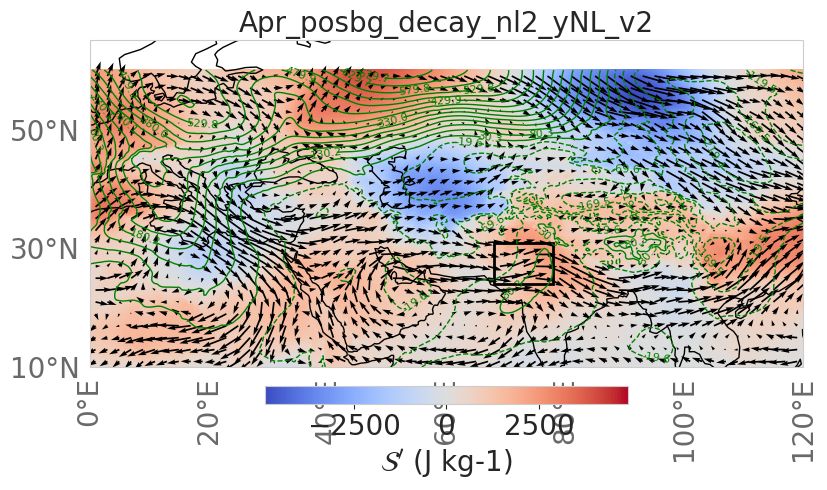

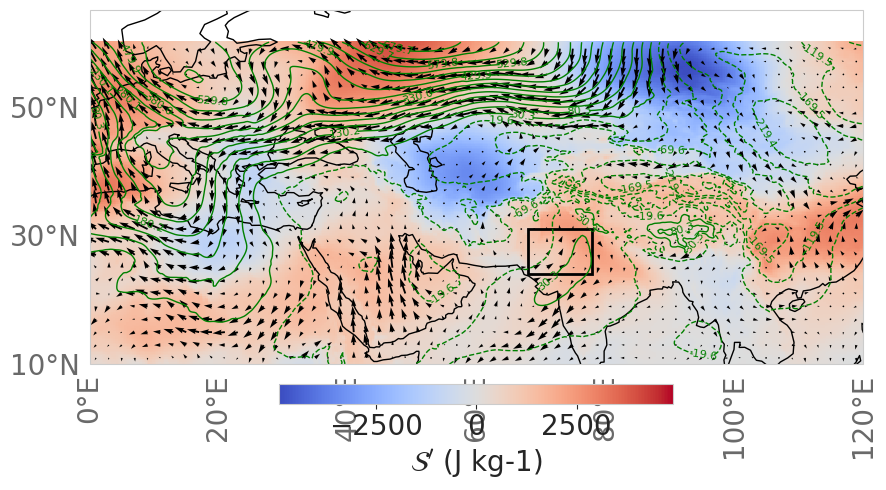

In [284]:
# for file in [s for s in files if any(t in s for t in ['negbg_decay_full_', 'negbg_decay_ql'])]:
# for i in range(len(files)):
# for i in [i for i in range(len(files)) if 'Apr_posbg_decay_nlsat_yNL' in files[i]]:
for i in range(len(files)):
# for i in [3,4,5]:
    for two_day_averaging in [True]:
#     if i != len(files)-1:
#         continue
        file = files[i]
        print(i, file)

        # delete all pngs starting with the filename
        png_lst = [s for s in os.listdir(dir_plots) if s.startswith(file.replace('.csv', '')) and s.endswith('.png')]

        if len(png_lst) > 0:
            for png in png_lst:
                os.remove(dir_plots + png)
            
    #     save_str1 = file.replace('.csv', '_fullwnds.png')
    #     save_str2 = file.replace('.csv', '_fullwnds_composite.png')
    #     save_str3 = file.replace('.csv', '_anomwnds.png')
    #     save_str4 = file.replace('.csv', '_anomwnds_composite.png')

    #     if len([s for s in os.listdir(dir_plots) if s in [t for t in [save_str1, save_str2, save_str3, save_str4]]]) == 4: 
    #         print('all plots exist for i = ', i)
    #         continue

        df = pd.read_csv(dir_csv + file, parse_dates=['date'])
        print(df.shape)
        
        if two_day_averaging == True:
            nc_lst = [s for s in os.listdir(dir_data) if 
                      starts_with_substring_and_number(s, file.replace('.csv', '') + '_') 
                     and s.endswith('_2Dave.nc')]
        else:
            nc_lst = [s for s in os.listdir(dir_data) if starts_with_substring_and_number(s, file.replace('.csv', '') + '_')]

        print('len(nc_lst)', len(nc_lst))
        
        
    #     if df.shape[0] <= 2:
    #         print('index', i, 'has <=2 rows')
    #         continue

    #     if len(nc_lst) != df.shape[0]:
    #         print('all dates\' nc files not available for index', i)
    #         continue

        if 'Net_Adv' not in df.columns:
            df['Net_Adv'] = df['adv_recon_2Dave'].copy()

        os.chdir(dir_data)
        def preprocess(ds):
            return ds.expand_dims('date')

        ds_brnch = xr.open_mfdataset(nc_lst, preprocess=preprocess)
        print('ds_brnch', ds_brnch.dims)

        flux_dts = df.date.to_list()
        print(len(flux_dts))

        #########################################
    #     plot composites once
        save_str2 = file.replace('.csv', '_fullwnds_composite{}.png'.format('_2Dave' if two_day_averaging==True else ''))
        save_str4 = file.replace('.csv', '_anomwnds_composite{}.png'.format('_2Dave' if two_day_averaging==True else ''))

        u_var = 'u'; v_var = 'v'; z_var = 'z_anom_10D'; dse_var = 'dse_anom'
        da_plt = ds_brnch[dse_var].mean(['date']).compute()
        da_cont = ds_brnch[z_var].mean(['date']).compute()
        da_u = (ds_brnch[u_var]).mean(['date']).compute()
        da_v = (ds_brnch[v_var]).mean(['date']).compute()

        plot_composite(
            da_plt = da_plt, 
            da_cont = da_cont, 
            da_u = da_u, 
            da_v =da_v, 
            xmin=0, xmax=120, ymin=10, ymax=65, 
            cont_divisions=20, coarsen_pts=8, 
            t_type = 'dse_anom', scale_quiv= 200, 
            title_str = file.replace('.csv',''), 
            save_str = save_str2 
        )

        gc.collect()
        gc.collect()

        u_var = 'u_anom_10D'; v_var = 'v_anom_10D'; z_var = 'z_anom_10D'; dse_var = 'dse_anom'
        da_plt = ds_brnch[dse_var].mean(['date']).compute()
        da_cont = ds_brnch[z_var].mean(['date']).compute()
        da_u = (ds_brnch[u_var]).mean(['date']).compute()
        da_v = (ds_brnch[v_var]).mean(['date']).compute()


        plot_composite(        
            da_plt = da_plt, 
            da_cont = da_cont, 
            da_u = da_u, 
            da_v =da_v, 
            xmin=0, xmax=120, ymin=10, ymax=65, 
            cont_divisions=20, coarsen_pts=8,
            t_type = 'dse_anom', scale_quiv= 200, 
        #   title_str = 'dse_flx = {}, date = {}'.format(tot_flx, str(df.date.iloc[i].date()))

            save_str = save_str4
        )
        gc.collect()
        gc.collect()


        ########################################
        ## each figure has 11 rows * 2 cols = 22 plots
        num_instances_22 = int(np.round((len(flux_dts)/22)))
        rmndr_plts = int(len(flux_dts)%22)
        tot_rnds = num_instances_22 + (1 if rmndr_plts>2 else 0)
        
        if tot_rnds==0:
            continue

        for n in range(1, tot_rnds+1):
            if (tot_rnds == 1) & (num_instances_22 == 0): # there are less than 22 instances and there is only the first round
                globals()[f'brnch_dates_{n}'] = flux_dts
            elif tot_rnds == num_instances_22: # each of the >=1 rounds has 22 instances
                globals()[f'brnch_dates_{n}'] = flux_dts[(n-1)*22:n*22]
            elif tot_rnds > num_instances_22: # last figure has < 22 plots
                if n <= num_instances_22: 
                    globals()[f'brnch_dates_{n}'] = flux_dts[(n-1)*22:n*22]
                if n > num_instances_22: 
                    globals()[f'brnch_dates_{n}'] = flux_dts[-1*rmndr_plts:]
                    
            save_str1 = file.replace('.csv', '_fullwnds_{}.png'.format(str(n) + ('_2Dave' if two_day_averaging==True else '')))
            save_str3 = file.replace('.csv', '_anomwnds_{}.png'.format(str(n) + ('_2Dave' if two_day_averaging==True else '')))

    #         brnch_dates = random.sample(flux_dts, 22 if df.shape[0] > 22 else df.shape[0])
    #         plot_samples(ds = ds_brnch, save_str = save_str1)

            ds = ds_brnch.sel(date=globals()[f'brnch_dates_{n}'])

            u_var = 'u'; v_var = 'v'; z_var = 'z_anom_10D'; dse_var = 'dse_anom'
            plot_samples(ds = ds, save_str = save_str1)
            gc.collect()
            gc.collect()

            u_var = 'u_anom_10D'; v_var = 'v_anom_10D'; z_var = 'z_anom_10D'; dse_var = 'dse_anom'
        #     plot_samples(ds = ds_brnch.sel(date=brnch_dates), save_str = save_str3)
            plot_samples(ds = ds, save_str = save_str3)
            gc.collect()
            gc.collect()


## Save only composites with standardized colorbar, quivers; and formatted with font and sizes

In [285]:
params = {
    'legend.fontsize': 15,
#           'legend.title_fontsize': 10,
#           'figure.figsize': (15, 5),
         'axes.labelsize':20, # this controls labelsize of both x and y axis of main plot as well as colorbar  
         'axes.titlesize':20, # pot title size
         'xtick.labelsize':15,
         'ytick.labelsize':15, # this controls yticks labelsize of both main plot and colorbar 
#    'lines.markersize': 1,
        'font.family': 'DejaVu Serif',
}

plt.rcParams.update(params)


0 Apr_posbg_decay_nl2_yNL_v2.csv
(6, 21)
len(nc_lst) 6
ds_brnch Frozen({'date': 6, 'latitude': 201, 'longitude': 481})
6
vmin =  -4000
vmax =  4000


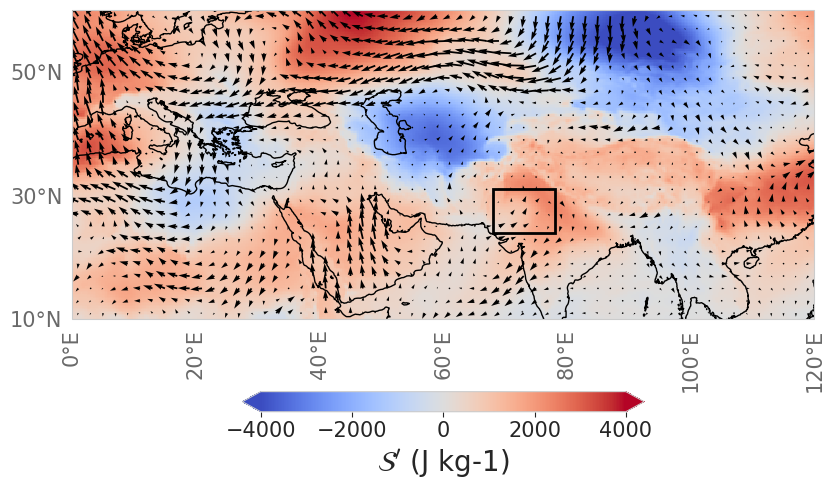

In [286]:
importlib.reload(composite_funcs)
from composite_funcs import *

for i in range(len(files)):
# for i in [0]:
    for two_day_averaging in [True]:
#     if i != len(files)-1:
#         continue
        file = files[i]
        print(i, file)

        # delete all pngs starting with the filename
        png_lst = [s for s in os.listdir(dir_plots) if s.startswith(file.replace('.csv', '')) and s.endswith('.png')]

        if len(png_lst) > 0:
            for png in png_lst:
                os.remove(dir_plots + png)
            
        df = pd.read_csv(dir_csv + file, parse_dates=['date'])
        print(df.shape)
        
        if two_day_averaging == True:
            nc_lst = [s for s in os.listdir(dir_data) if 
                      starts_with_substring_and_number(s, file.replace('.csv', '') + '_') 
                     and s.endswith('_2Dave.nc')]
        else:
            nc_lst = [s for s in os.listdir(dir_data) if starts_with_substring_and_number(s, file.replace('.csv', '') + '_')]

        print('len(nc_lst)', len(nc_lst))
        
    
        if 'Net_Adv' not in df.columns:
            df['Net_Adv'] = df['adv_recon_2Dave'].copy()

        os.chdir(dir_data)
        def preprocess(ds):
            return ds.expand_dims('date')

        ds_brnch = xr.open_mfdataset(nc_lst, preprocess=preprocess)
        print('ds_brnch', ds_brnch.dims)

        flux_dts = df.date.to_list()
        print(len(flux_dts))

        #########################################
    #     plot composites once
        save_str4 = file.replace('.csv', '_anomwnds_composite{}.png'.format('_2Dave' if two_day_averaging==True else ''))

        u_var = 'u_anom_10D'; v_var = 'v_anom_10D'; z_var = 'z_anom_10D'; dse_var = 'dse_anom'
        da_plt = ds_brnch[dse_var].mean(['date']).compute()
        da_cont = ds_brnch[z_var].mean(['date']).compute()
        da_u = (ds_brnch[u_var]).mean(['date']).compute()
        da_v = (ds_brnch[v_var]).mean(['date']).compute()

        plot_composite(        
            da_plt = da_plt, 
            da_cont = da_cont, 
            da_u = da_u, 
            da_v =da_v, 
            xmin=da_plt.longitude.values.min().astype('int'), 
            xmax=da_plt.longitude.values.max().astype('int'), 
            ymin=da_plt.latitude.values.min().astype('int'), 
            ymax=da_plt.latitude.values.max().astype('int'), 
            vmin_in = -4000, vmax_in = 4000,
            contours='off', 
            cbar_pad=0.18,
            cont_divisions=20, coarsen_pts=8,
            t_type = 'dse_anom', scale_quiv= 200, 
            latlon_ticksz=10, 
            latlon_tickcol = 'dimgray',
            dir_out = '/home/data/lab_hardik/heatwaves/ERA5/analyses/phase_relations/plots_final/',
        #   title_str = 'dse_flx = {}, date = {}'.format(tot_flx, str(df.date.iloc[i].date()))
#             save_str = save_str4
        )
        gc.collect()
        gc.collect()


In [287]:
files

['Apr_posbg_decay_nl2_yNL_v2.csv']

In [276]:
[i for i in range(7) if i not in [4,5]]

[0, 1, 2, 3, 6]

In [277]:
importlib.reload(composite_funcs)
from composite_funcs import *

[30. 60. 90.]
[10. 30. 50.]


In [159]:
files

['Apr_posbg_amplif_nl_yNL_v2.csv',
 'Apr_posbg_amplif_nlsat_xNL_v2.csv',
 'Apr_posbg_amplif_ql_xy_v2.csv',
 'Apr_posbg_decay_nl_xNL_v2.csv',
 'Apr_posbg_decay_nl_yNL_v2.csv',
 'Apr_posbg_decay_nlsat_yNL_v2.csv',
 'Apr_posbg_decay_ql_xy_v2.csv',
 'Apr_posbg_decay_ql_xyip_v2.csv']

In [60]:
pd.read_csv(dir_csv + 'Apr_posbg_amplif_nl_yNL_v2.csv').sort_values("dse_anom_dec")

date  $u'$$\mathcal{S}^'_x$  $v'$$\mathcal{S}^'_y$  \
1  1996-04-14            -660.625905            1096.932735   
4  2007-04-10             -77.443745             597.625697   
2  1996-04-25             351.636869             538.421498   
5  2007-04-11              19.197623             402.985670   
6  2015-04-18             372.160252             410.019688   
0  1981-04-10             -76.845895             480.251919   
3  1998-04-01            -398.493169            1010.525809   
7  2017-04-12              72.427924            1002.462166   

   $w'$$\mathcal{S}^'_z$  $u'$$\mathcal{S}̅_x$  $v'$$\mathcal{S}̅_y$  \
1             156.974071             58.778339          -1310.745779   
4             105.550829             -9.453931           -888.106210   
2              27.791382            -31.700171          -1118.114467   
5             -11.963251            -38.416037           -480.940535   
6              44.729339            -18.344729          -1134.311231   
0             396.708654              8.680794          -1552.876139   
3             -48.351672            -31.768331          -1552.298547   
7             -71.116486            -37.084134          -1944.513938   

   $w'$$\mathcal{S}̅_z$  ${u̅}$$\mathcal{S}^'_x$  ${v̅}$$\mathcal{S}^'_y$  \
1            939.403259               711.272385               348.531737   
4            974.564239               520.362881               159.252683   
2            184.972585              1655.114251                47.789955   
5            681.941663               203.780575               174.936790   
6            601.861314               942.310903                80.648086   
0           1490.536493               422.021601               -58.806759   
3            178.693867              1741.734233                91.383996   
7           1342.102680               887.744252               105.281430   

   ${w̅}$$\mathcal{S}^'_z$  ...  dse_anom_dec  quadrant  prim_cls  regime_cls  \
1                -5.524023  ...             6         2       2.2   amplif_NL   
4                66.696627  ...             6         2       2.2   amplif_NL   
2                 4.508002  ...             7         2       2.2   amplif_NL   
5                91.597967  ...             8         2       2.2   amplif_NL   
6               -13.110101  ...             8         2       2.2         NaN   
0               148.361470  ...             9         2       2.2   amplif_NL   
3                52.761976  ...             9         2       2.2   amplif_NL   
7                 6.510015  ...             9         2       2.2   amplif_NL   

   bg_cls  bg_cls_main  Net_Adv_dec  dse_anom_Lag1_clss  regime_cls_2  \
1    pos1          pos            9                   6     amplif_NL   
4    pos1          pos            9                   6     amplif_NL   
2    pos1          pos            9                   5     amplif_NL   
5    pos1          pos            8                   8     amplif_NL   
6    pos1          pos            9                   7           NaN   
0    pos1          pos            9                   8     amplif_NL   
3    pos1          pos            9                   9     amplif_NL   
7    pos1          pos            9                   8     amplif_NL   

   Net_Adv_clss  
1             9  
4             9  
2             9  
5             9  
6             9  
0             9  
3             9  
7             9  

[8 rows x 66 columns]

In [160]:
params = {
#     'legend.fontsize': 10,
#           'legend.title_fontsize': 10,
#           'figure.figsize': (15, 5),
         'axes.labelsize':20, # this controls labelsize of both x and y axis of main plot as well as colorbar  
         'axes.titlesize':20, # pot title size
         'xtick.labelsize':20,
         'ytick.labelsize':20, # this controls yticks labelsize of both main plot and colorbar 
#    'lines.markersize': 1,
        'font.family': 'DejaVu Serif', 
}

plt.rcParams.update(params)


In [161]:
importlib.reload(composite_funcs)
from composite_funcs import *

[30. 60. 90.]
[10. 30. 50.]


In [162]:
files

['Apr_posbg_amplif_nl_yNL_v2.csv',
 'Apr_posbg_amplif_nlsat_xNL_v2.csv',
 'Apr_posbg_amplif_ql_xy_v2.csv',
 'Apr_posbg_decay_nl_xNL_v2.csv',
 'Apr_posbg_decay_nl_yNL_v2.csv',
 'Apr_posbg_decay_nlsat_yNL_v2.csv',
 'Apr_posbg_decay_ql_xy_v2.csv',
 'Apr_posbg_decay_ql_xyip_v2.csv']

In [163]:
# files_fin
[
    s for s in files if s not in 
    [
 'Apr_posbg_decay_nl_yNL_v2.csv',
 'Apr_posbg_decay_ql_xyip_v2.csv'
    ]
]

['Apr_posbg_amplif_nl_yNL_v2.csv',
 'Apr_posbg_amplif_nlsat_xNL_v2.csv',
 'Apr_posbg_amplif_ql_xy_v2.csv',
 'Apr_posbg_decay_nl_xNL_v2.csv',
 'Apr_posbg_decay_nlsat_yNL_v2.csv',
 'Apr_posbg_decay_ql_xy_v2.csv']

[30. 60. 90.]
[10. 30. 50.]
0 Apr_posbg_amplif_nl_yNL_v2.csv
(8, 66)
len(nc_lst) 8
ds_brnch Frozen({'date': 8, 'latitude': 201, 'longitude': 481})
8
vmin =  -4000
vmax =  4000
1 Apr_posbg_amplif_nlsat_xNL_v2.csv
(14, 27)
len(nc_lst) 14
ds_brnch Frozen({'date': 14, 'latitude': 201, 'longitude': 481})
14
vmin =  -4000
vmax =  4000
2 Apr_posbg_amplif_ql_xy_v2.csv
(19, 27)
len(nc_lst) 19
ds_brnch Frozen({'date': 19, 'latitude': 201, 'longitude': 481})
19
vmin =  -4000
vmax =  4000
3 Apr_posbg_decay_nl_xNL_v2.csv
(11, 27)
len(nc_lst) 11
ds_brnch Frozen({'date': 11, 'latitude': 201, 'longitude': 481})
11
vmin =  -4000
vmax =  4000
4 Apr_posbg_decay_ql_xy_v2.csv
(17, 27)
len(nc_lst) 17
ds_brnch Frozen({'date': 17, 'latitude': 201, 'longitude': 481})
17
vmin =  -4000
vmax =  4000


/tmp/ipykernel_2753568/262883711.py:169: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.


IndexError: list index out of range

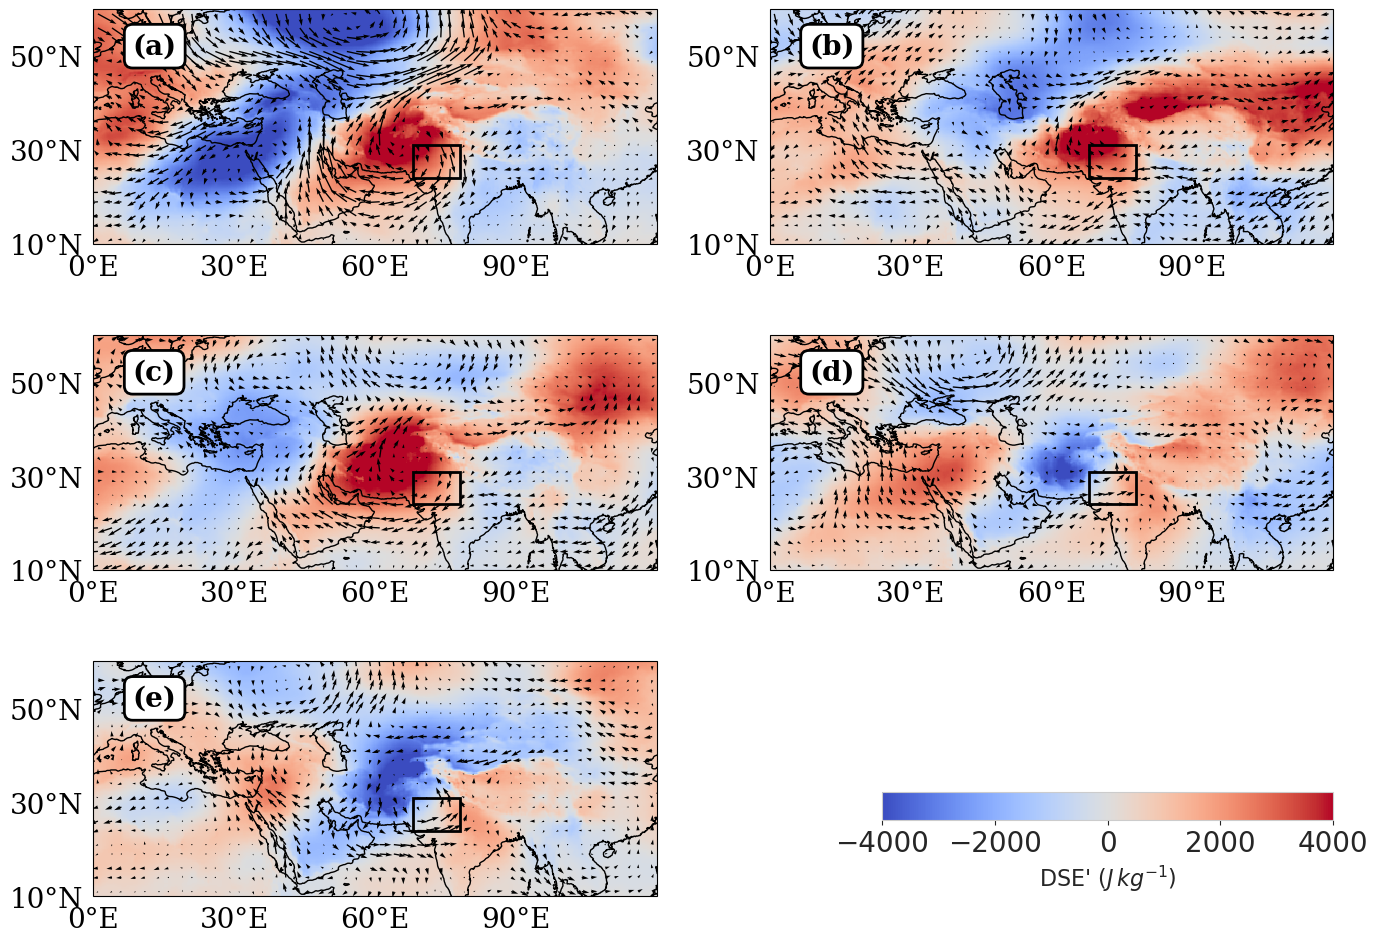

In [171]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

params = {
    'legend.fontsize': 15,
#           'legend.title_fontsize': 10,
#           'figure.figsize': (15, 5),
         'axes.labelsize':20, # this controls labelsize of both x and y axis of main plot as well as colorbar  
         'axes.titlesize':20, # pot title size
         'xtick.labelsize':20,
         'ytick.labelsize':20, # this controls yticks labelsize of both main plot and colorbar 
#    'lines.markersize': 1,
        'font.family': 'DejaVu Serif',
}

plt.rcParams.update(params)

import matplotlib.gridspec as gridspec
nrow = 3
ncol = 2

fig = plt.figure(figsize = (16,nrow*4))
gs = gridspec.GridSpec(nrow, ncol)

ax = [
    [fig.add_subplot(gs[0, 0], projection= ccrs.PlateCarree()), fig.add_subplot(gs[0, 1], projection= ccrs.PlateCarree())],
    [fig.add_subplot(gs[1, 0], projection= ccrs.PlateCarree()), fig.add_subplot(gs[1, 1], projection= ccrs.PlateCarree())],
    [fig.add_subplot(gs[2, 0], projection= ccrs.PlateCarree()), fig.add_subplot(gs[2, 1], projection= ccrs.PlateCarree())], 
#     [fig.add_subplot(gs[3, :])]
]

importlib.reload(composite_funcs)
from composite_funcs import *

k=0
files_fin = \
[
    s for s in files if s not in 
    [
 'Apr_posbg_decay_nl_yNL_v2.csv',
 'Apr_posbg_decay_ql_xyip_v2.csv', 
        'Apr_posbg_decay_nlsat_yNL_v2.csv'
    ]
]

for i in range(len(files_fin)):
# for i in [i for i in range(7) if i not in [4,5]]:
    for two_day_averaging in [True]:
        file = files_fin[i]
        print(i, file)
        
        rowind = bicol_panel_rownum(k)
        colind = bicol_panel_colnum(k)

        df = pd.read_csv(dir_csv + file, parse_dates=['date'])
        print(df.shape)
        
        if two_day_averaging == True:
            nc_lst = [s for s in os.listdir(dir_data) if 
                      starts_with_substring_and_number(s, file.replace('.csv', '') + '_') 
                     and s.endswith('_2Dave.nc')]
        else:
            nc_lst = [s for s in os.listdir(dir_data) if starts_with_substring_and_number(s, file.replace('.csv', '') + '_')]

        print('len(nc_lst)', len(nc_lst))
        

        if 'Net_Adv' not in df.columns:
            df['Net_Adv'] = df['adv_recon_2Dave'].copy()

        os.chdir(dir_data)
        def preprocess(ds):
            return ds.expand_dims('date')

        ds_brnch = xr.open_mfdataset(nc_lst, preprocess=preprocess)
        print('ds_brnch', ds_brnch.dims)

        flux_dts = df.date.to_list()
        print(len(flux_dts))

        #########################################
    #     plot composites once
        u_var = 'u_anom_10D'; v_var = 'v_anom_10D'; z_var = 'z_anom_10D'; dse_var = 'dse_anom'
        da_plt = ds_brnch[dse_var].mean(['date']).compute()
        da_cont = ds_brnch[z_var].mean(['date']).compute()
        da_u = (ds_brnch[u_var]).mean(['date']).compute()
        da_v = (ds_brnch[v_var]).mean(['date']).compute()

        plot_composite_final_plot(
            da_plt = da_plt, 
            da_cont = da_cont, 
            cbar_on = False, #if rowind + 1 < nrow else True,
            da_u = da_u, 
            da_v =da_v, 
            axi = ax[rowind][colind],
            xmin=da_plt.longitude.values.min().astype('int'), 
            xmax=da_plt.longitude.values.max().astype('int'), 
            ymin=da_plt.latitude.values.min().astype('int'), 
            ymax=da_plt.latitude.values.max().astype('int'), 
            vmin_in = -4000, vmax_in = 4000,
            contours='off', 
            cbar_pad= 0.1 if rowind + 1 < nrow else 0.3,
            cont_divisions=20, 
            coarsen_pts=10,
            scale_quiv= 150, 
            t_type = 'dse_anom', 
            latlon_ticksz=20, 
            latlon_tickcol = 'black',
            
            xtickrot=0,
            ytickrot=0,
            num_xticks=3,
            num_yticks=3

        )
        
        k = k+1
        gc.collect()
        gc.collect()

        
for r in range(nrow):
    for c in range(ncol):
        for label in ax[r][c].get_xticklabels() + ax[r][c].get_yticklabels():
            label.set_fontname('DejaVu Serif')
            
fontname = 'DejaVu Serif'
props = dict(boxstyle='round', facecolor='white', alpha=1, edgecolor='k', linewidth=2)
k=0
for rowind in range(3):
    for colind in range(2):
        ax[rowind][colind].text(.07, .9, '({})'.format(chr(97+k)), transform=ax[rowind][colind].transAxes, 
                                fontsize=20, fontname =fontname, 
                      verticalalignment='top', c='k', bbox=props, fontweight='bold')

#         if (rowind!=nrow-1) or (colind==0):
        current_ax = ax[rowind][colind]
        current_ax.spines["top"].set_linewidth(border_thickness)
        current_ax.spines["right"].set_linewidth(border_thickness)
        current_ax.spines["bottom"].set_linewidth(border_thickness)
        current_ax.spines["left"].set_linewidth(border_thickness)
        # Optional: Customize border color
        for spine in current_ax.spines.values():
            spine.set_color("black")

#         if colind == 1:
#             ax[rowind][colind].set_yticklabels([])
#         if (rowind == 0) or ((rowind == 1) and (colind == 0)):
#             ax[rowind][colind].set_xticklabels([])

        k+=1

fig.delaxes(ax[2][1])  # Adjust index for the empty subplot
fig.patch.set_facecolor('white')  # Background color

# Get the position of the GridSpec cell (row 2, col 1)
bbox = gs[2, 1].get_position(fig)

# Shrink the width of the box (e.g., to 30% of the original width)
new_height = bbox.height * 0.1
new_bottom = bbox.y0 + bbox.height * 0.35  # Center vertically

# Create a new axis for the colorbar using adjusted coordinates
cbar_ax = fig.add_axes([bbox.x0 + bbox.width*0.2, new_bottom, bbox.width*0.8, new_height])

# # Define normalization and colormap
norm = colors.Normalize(vmin=-4000, vmax=4000)
cmap = cm.get_cmap('coolwarm')

# Create the mappable object
mappable = cm.ScalarMappable(norm=norm, cmap=cmap)
mappable.set_array([])  # Required for colorbar to work


# Define bin edges (e.g., every 1000 J/kg from -4000 to 4000)
# bounds = np.linspace(-4000, 4000, num=9)  # 8 bins

# # Create norm and colormap
# norm = colors.BoundaryNorm(boundaries=bounds, ncolors=len(bounds)-1)
# cmap = cm.get_cmap('coolwarm', len(bounds)-1)

# # Create mappable
# mappable = cm.ScalarMappable(norm=norm, cmap=cmap)
# mappable.set_array([])

# Add the colorbar
cbar = fig.colorbar(mappable, cax=cbar_ax, orientation='horizontal')
cbar.set_label('DSE\' $(J\,kg^{-1})$', fontsize=16)
# Create a new axis for the colorbar using adjusted coordinates
# cbar_ax = fig.add_axes([bbox.x0 + bbox.width*0.2, new_bottom, bbox.width*0.8, new_height])

# Add the colorbar
# cbar = fig.colorbar(ax[0][0].get_images()[0], cax=cbar_ax)
# cbar.set_label('$\mathcal{S}\'$ (J kg$^{-1}$)', fontsize=16)

# props = dict(boxstyle='round,pad=0.5', facecolor='whitesmoke', alpha=1, edgecolor='black')
props = dict(boxstyle='square', facecolor='whitesmoke', alpha=1, edgecolor='black')
annot_size = 18
ann_coords = [.65, .7]

comp_anns = [
    
    '$v\' \mathcal{S}\'_{y}\gg0$', 
    '$u\'\mathcal{S}\'_{x}\ll0$',
    '$v\'\mathcal{S}\'_{y}>0$,\n$u\'\mathcal{S}\'_{x}<0$', 
    '$u\'\mathcal{S}\'_{x}\ll0$', 
    '$v\' \mathcal{S}\'_{y}\gg0$', 
    '$v\'\mathcal{S}\'_{y}>0$,\n$u\'\mathcal{S}\'_{x}<0$'
]

ann_coords = [1, 1]

arrow_tip_y = 0.35
arrow_tip_x = 0.65
ref_height = 0.24  # Use the larger axes height as reference
scaled_fontsize = int(annot_size * bbox.height / ref_height)

for r in range(3):
    for c in range(2):

            renderer = fig.canvas.get_renderer()
            text_obj = ax[r][c].annotate(
                text=comp_anns[k],
                xy=(arrow_tip_x, arrow_tip_y),
                xytext=(1.0, 1.0),
                textcoords='axes fraction',
                xycoords='axes fraction',
                fontsize=scaled_fontsize,
                fontname=fontname,
                verticalalignment='top',
                horizontalalignment='right',
                color='black',
                bbox=props,
            )

            # Get bounding box in display coordinates
            bbox_display = text_obj.get_window_extent(renderer=renderer)

            # Convert to axes fraction
            bbox_axes = ax[r][c].transAxes.inverted().transform_bbox(bbox_display)
            box_width = bbox_axes.width
            box_height = bbox_axes.height

#             # for rounded edges
#             if ((r != 0) and (c==0)):
#                 text_obj.set_position((1.0 - box_width + 0.0145, 1.0 - box_height - 0.012))
#             else:
#                 text_obj.set_position((1.0 - box_width + 0.0145, 1.0 - box_height - 0.02))

            # for sharp edges
            if ((r != 0) and (c==0)):
                text_obj.set_position((1.0 - box_width + 0.017, 1.0 - box_height))
            else:
                text_obj.set_position((1.0 - box_width + 0.017, 1.0 - box_height - 0.008))

            text_obj.set_ha('left')
            text_obj.set_va('bottom')

            k = k +1

# plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
# fig.subplots_adjust(hspace=0.01, wspace=0.05)
fig.tight_layout()
# plt.savefig('/home/data/lab_hardik/Manuscript1/Fig_Apr_regimes_posbg.pdf', bbox_inches='tight')
# plt.savefig('/home/data/lab_hardik/Manuscript1/Fig_Apr_regimes_posbg.svg', bbox_inches='tight')


In [189]:
files_fin = \
[
    s for s in files if s not in 
    [
 'Apr_posbg_decay_nl_yNL_v2.csv',
 'Apr_posbg_decay_ql_xyip_v2.csv'
    ]
]
print(len(files_fin))
files_fin

6


['Apr_posbg_amplif_nl_yNL_v2.csv',
 'Apr_posbg_amplif_nlsat_xNL_v2.csv',
 'Apr_posbg_amplif_ql_xy_v2.csv',
 'Apr_posbg_decay_nl_xNL_v2.csv',
 'Apr_posbg_decay_nlsat_yNL_v2.csv',
 'Apr_posbg_decay_ql_xy_v2.csv']

In [243]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

importlib.reload(composite_funcs)
from composite_funcs import *

[30. 60. 90.]
[10. 30. 50.]


0 Apr_posbg_amplif_nl_yNL_v2.csv
(8, 66)
len(nc_lst) 8
ds_brnch Frozen({'date': 8, 'latitude': 201, 'longitude': 481})
8
vmin =  -4000
vmax =  4000
1 Apr_posbg_amplif_nlsat_xNL_v2.csv
(14, 27)
len(nc_lst) 14
ds_brnch Frozen({'date': 14, 'latitude': 201, 'longitude': 481})
14
vmin =  -4000
vmax =  4000
2 Apr_posbg_amplif_ql_xy_v2.csv
(19, 27)
len(nc_lst) 19
ds_brnch Frozen({'date': 19, 'latitude': 201, 'longitude': 481})
19
vmin =  -4000
vmax =  4000
3 Apr_posbg_decay_nl_xNL_v2.csv
(11, 27)
len(nc_lst) 11
ds_brnch Frozen({'date': 11, 'latitude': 201, 'longitude': 481})
11
vmin =  -4000
vmax =  4000
4 Apr_posbg_decay_nlsat_yNL_v2.csv
(9, 27)
len(nc_lst) 9
ds_brnch Frozen({'date': 9, 'latitude': 201, 'longitude': 481})
9
vmin =  -4000
vmax =  4000
5 Apr_posbg_decay_ql_xy_v2.csv
(17, 27)
len(nc_lst) 17
ds_brnch Frozen({'date': 17, 'latitude': 201, 'longitude': 481})
17
vmin =  -4000
vmax =  4000


/tmp/ipykernel_2753568/2056966728.py:169: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.


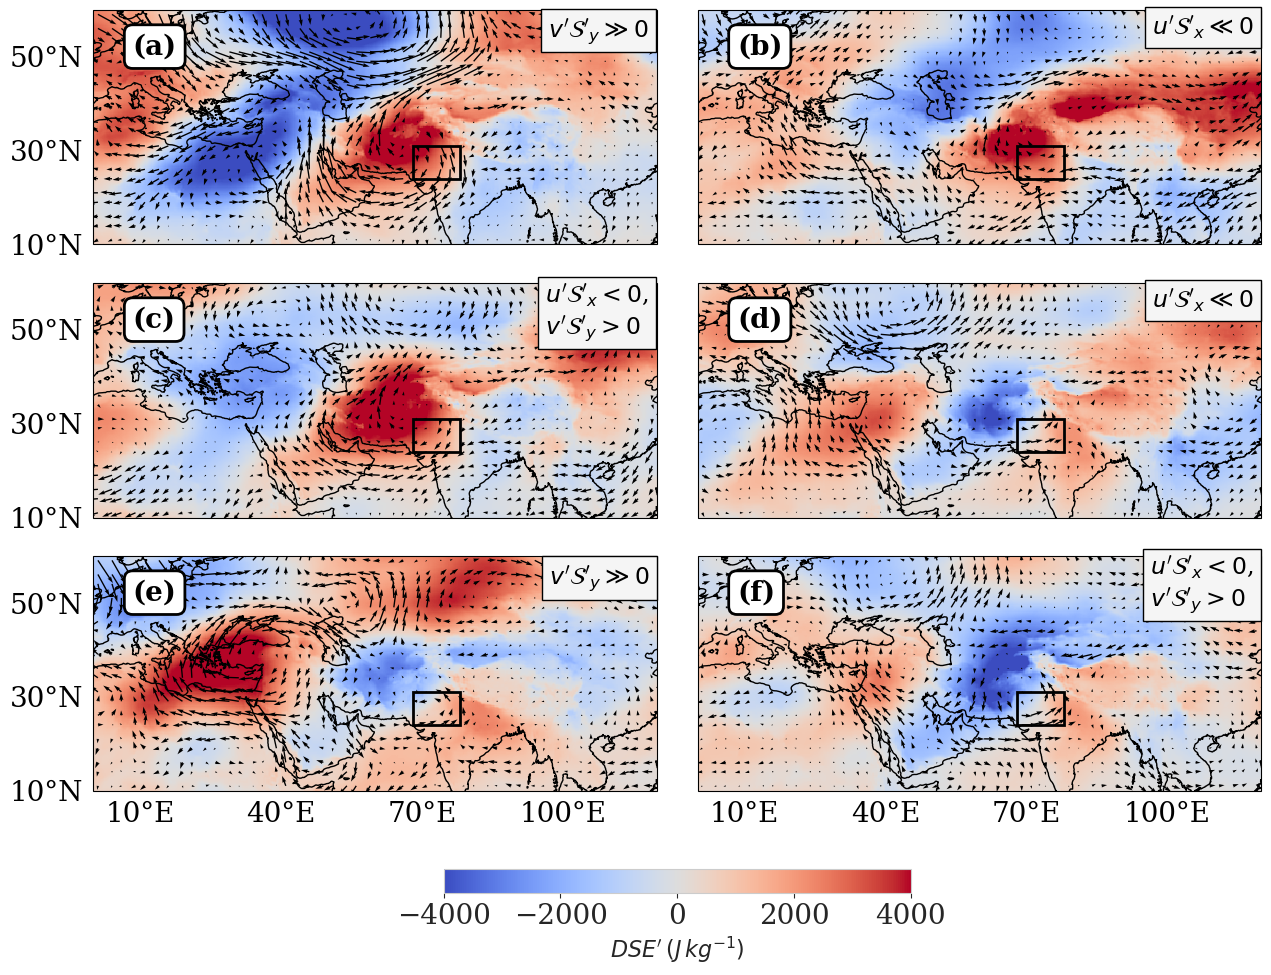

In [267]:
params = {
    'legend.fontsize': 15,
#           'legend.title_fontsize': 10,
#           'figure.figsize': (15, 5),
         'axes.labelsize':20, # this controls labelsize of both x and y axis of main plot as well as colorbar  
         'axes.titlesize':20, # pot title size
         'xtick.labelsize':20,
         'ytick.labelsize':20, # this controls yticks labelsize of both main plot and colorbar 
#    'lines.markersize': 1,
        'font.family': 'DejaVu Serif',
}

plt.rcParams.update(params)

nrow = 3
ncol = 2

fig, ax = plt.subplots(
    nrows=nrow, ncols=ncol, 
    sharey=False, 
    subplot_kw={'projection': ccrs.PlateCarree()}, 
    figsize=(16,4*nrow),
#     constrained_layout=True
    gridspec_kw={'hspace': 0.01}
)

# import matplotlib.gridspec as gridspec

# fig = plt.figure(figsize=(16, 4 * nrow))
# gs = gridspec.GridSpec(nrow, ncol, figure=fig, hspace=0.05)  # Try hspace=0.03 or lower

# ax = np.empty((nrow, ncol), dtype=object)

# for r in range(nrow):
#     for c in range(ncol):
#         ax[r, c] = fig.add_subplot(gs[r, c], projection=ccrs.PlateCarree())

k=0
files_fin = \
[
    s for s in files if s not in 
    [
 'Apr_posbg_decay_nl_yNL_v2.csv',
 'Apr_posbg_decay_ql_xyip_v2.csv'
    ]
]

for i in range(len(files_fin)):
# for i in [i for i in range(7) if i not in [4,5]]:
    for two_day_averaging in [True]:
        file = files_fin[i]
        print(i, file)
        
        rowind = bicol_panel_rownum(k)
        colind = bicol_panel_colnum(k)

        df = pd.read_csv(dir_csv + file, parse_dates=['date'])
        print(df.shape)
        
        if two_day_averaging == True:
            nc_lst = [s for s in os.listdir(dir_data) if 
                      starts_with_substring_and_number(s, file.replace('.csv', '') + '_') 
                     and s.endswith('_2Dave.nc')]
        else:
            nc_lst = [s for s in os.listdir(dir_data) if starts_with_substring_and_number(s, file.replace('.csv', '') + '_')]

        print('len(nc_lst)', len(nc_lst))
        

        if 'Net_Adv' not in df.columns:
            df['Net_Adv'] = df['adv_recon_2Dave'].copy()

        os.chdir(dir_data)
        def preprocess(ds):
            return ds.expand_dims('date')

        ds_brnch = xr.open_mfdataset(nc_lst, preprocess=preprocess)
        print('ds_brnch', ds_brnch.dims)

        flux_dts = df.date.to_list()
        print(len(flux_dts))

        #########################################
    #     plot composites once
        u_var = 'u_anom_10D'; v_var = 'v_anom_10D'; z_var = 'z_anom_10D'; dse_var = 'dse_anom'
        da_plt = ds_brnch[dse_var].mean(['date']).compute()
        da_cont = ds_brnch[z_var].mean(['date']).compute()
        da_u = (ds_brnch[u_var]).mean(['date']).compute()
        da_v = (ds_brnch[v_var]).mean(['date']).compute()

        plot_composite_final_plot(
            da_plt = da_plt, 
            da_cont = da_cont, 
            cbar_on = False, #if rowind + 1 < nrow else True,
            da_u = da_u, 
            da_v =da_v, 
            axi = ax[rowind,colind],
            xmin=da_plt.longitude.values.min().astype('int'), 
            xmax=da_plt.longitude.values.max().astype('int'), 
            ymin=da_plt.latitude.values.min().astype('int'), 
            ymax=da_plt.latitude.values.max().astype('int'), 
            vmin_in = -4000, vmax_in = 4000,
            contours='off', 
            cbar_pad= 0.1 if rowind + 1 < nrow else 0.3,
            cont_divisions=20, 
            coarsen_pts=10,
            scale_quiv= 150, 
            t_type = 'dse_anom', 
            latlon_ticksz=20, 
            latlon_tickcol = 'black',
            
            xtickrot=0,
            ytickrot=0,
            num_xticks=4,
            num_yticks=3, 
            xtick_offset=10

        )
        
        k = k+1
        gc.collect()
        gc.collect()

        
for r in range(nrow):
    for c in range(ncol):
        for label in ax[r,c].get_xticklabels() + ax[r][c].get_yticklabels():
            label.set_fontname('DejaVu Serif')
            
fontname = 'DejaVu Serif'
props = dict(boxstyle='round', facecolor='white', alpha=1, edgecolor='k', linewidth=2)
k=0
for rowind in range(3):
    for colind in range(2):
        ax[rowind,colind].text(.07, .9, '({})'.format(chr(97+k)), transform=ax[rowind,colind].transAxes, 
                                fontsize=20, fontname =fontname, 
                      verticalalignment='top', c='k', bbox=props, fontweight='bold')

#         if (rowind!=nrow-1) or (colind==0):
        current_ax = ax[rowind,colind]
        current_ax.spines["top"].set_linewidth(border_thickness)
        current_ax.spines["right"].set_linewidth(border_thickness)
        current_ax.spines["bottom"].set_linewidth(border_thickness)
        current_ax.spines["left"].set_linewidth(border_thickness)
        # Optional: Customize border color
        for spine in current_ax.spines.values():
            spine.set_color("black")

#         if colind == 1:
#             ax[rowind,colind].set_yticklabels([])
#         if (rowind == 0) or ((rowind == 1) and (colind == 0)):
#             ax[rowind,colind].set_xticklabels([])

        k+=1

# fig.delaxes(ax[2][1])  # Adjust index for the empty subplot
fig.patch.set_facecolor('white')  # Background color

# Get the position of the GridSpec cell (row 2, col 1)
# bbox = gs[2, 1].get_position(fig)
# 
# Shrink the width of the box (e.g., to 30% of the original width)
# new_height = bbox.height * 0.1
# new_bottom = bbox.y0 + bbox.height * 0.35  # Center vertically

# Create a new axis for the colorbar using adjusted coordinates
# cbar_ax = fig.add_axes([bbox.x0 + bbox.width*0.2, new_bottom, bbox.width*0.8, new_height])
norm = colors.Normalize(vmin=-4000, vmax=4000)
cmap = cm.get_cmap('coolwarm')
mappable = cm.ScalarMappable(norm=norm, cmap=cmap)
mappable.set_array([])  # Required for colorbar to work

# cbar_ax = fig.add_axes([0.25, 0.08, 0.5, 0.02])

# props = dict(boxstyle='round,pad=0.5', facecolor='whitesmoke', alpha=1, edgecolor='black')
props = dict(boxstyle='square', facecolor='whitesmoke', alpha=1, edgecolor='black')
annot_size = 18

comp_anns = [
    
    '$v\' \mathcal{S}\'_{y}\gg0$', 
    '$u\'\mathcal{S}\'_{x}\ll0$',
    '$u\'\mathcal{S}\'_{x}<0$,\n$v\'\mathcal{S}\'_{y}>0$', 
    '$u\'\mathcal{S}\'_{x}\ll0$', 
    '$v\' \mathcal{S}\'_{y}\gg0$', 
    '$u\'\mathcal{S}\'_{x}<0$,\n$v\'\mathcal{S}\'_{y}>0$'
]

ann_coords = [1, 1]

arrow_tip_y = 0.35
arrow_tip_x = 0.65
ref_height = 0.24  # Use the larger axes height as reference
scaled_fontsize = int(annot_size * bbox.height / ref_height)
k=0

for r in range(3):
    for c in range(2):

            renderer = fig.canvas.get_renderer()
            text_obj = ax[r][c].annotate(
                text=comp_anns[k],
                xy=(arrow_tip_x, arrow_tip_y),
                xytext=(1.0, 1.0),
                textcoords='axes fraction',
                xycoords='axes fraction',
                fontsize=scaled_fontsize,
                fontname=fontname,
                verticalalignment='top',
                horizontalalignment='right',
                color='black',
                bbox=props,
            )

            # Get bounding box in display coordinates
            bbox_display = text_obj.get_window_extent(renderer=renderer)

            # Convert to axes fraction
            bbox_axes = ax[r][c].transAxes.inverted().transform_bbox(bbox_display)
            box_width = bbox_axes.width
            box_height = bbox_axes.height

#             # for rounded edges
#             if ((r != 0) and (c==0)):
#                 text_obj.set_position((1.0 - box_width + 0.0145, 1.0 - box_height - 0.012))
#             else:
#                 text_obj.set_position((1.0 - box_width + 0.0145, 1.0 - box_height - 0.02))

            # for sharp edges
            if ((r == 1) and (c==0)) or ((r==2) and (c==1)):
                text_obj.set_position((1.0 - box_width - 0.0135, 1.0 - box_height - 0.05)) #  - 0.008
            else:
                text_obj.set_position((1.0 - box_width - 0.013, 1.0 - box_height- 0.06)) #
           
            if ((r==0) or (r==1)) and (c==1):
                text_obj.set_position((1.0 - box_width - 0.013, 1.0 - box_height- 0.045)) #
                
            if ((r==0) or (r==1)) and (c==0):
                text_obj.set_position((1.0 - box_width - 0.014, 1.0 - box_height- 0.055)) #
            
#             text_obj.set_position((1.0 - box_width-0.015, 1.0 - box_height-0.08)) #  - 0.008

            text_obj.set_ha('left')
            text_obj.set_va('bottom')
            
            if (r != (nrow-1)):
                ax[r,c].set_xticks([])                
            if (c != 0):
                ax[r,c].set_yticks([])
            k = k +1

# plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
# fig.subplots_adjust(hspace=0.01, wspace=0.05)

# fig.subplots_adjust(hspace=0.05) 
# plt.tight_layout(pad=0.05, w_pad=0.05, h_pad=0.01)


for r in range(nrow):
    for c in range(ncol):
        pos = ax[r, c].get_position()
        # Shift upward and compress height
        ax[r, c].set_position([
            pos.x0 - 0.045 * (ncol + c - 2),
            pos.y0 + 0.03 * (nrow + r - 3), 
            pos.width,
            pos.height             
        ])

bbox_left = ax[2, 0].get_position()
bbox_right = ax[2, 1].get_position()

# Compute full horizontal span
left_edge = bbox_left.x0
right_edge = bbox_right.x0 + bbox_right.width
new_center = (left_edge + right_edge) / 2
new_total_width = right_edge - left_edge

# Define colorbar dimensions
new_width = new_total_width * 0.4  # narrower than full span
new_left = new_center - new_width / 2
new_bottom = bbox_left.y0 - 0.085
new_height = 0.02

# Create colorbar axis and draw colorbar
cbar_ax = fig.add_axes([new_left, new_bottom, new_width, new_height])

cbar = fig.colorbar(mappable, cax=cbar_ax, orientation='horizontal')
cbar.set_label('$DSE\'\,(J\,kg^{-1})$', fontsize=16)

plt.savefig('/home/data/lab_hardik/Manuscript1/Fig_Apr_regimes_posbg.pdf', bbox_inches=None)
# plt.savefig('/home/data/lab_hardik/Manuscript1/Fig_Apr_regimes_posbg.svg', bbox_inches='tight')

In [218]:
files_fin

['Apr_posbg_amplif_nl_yNL_v2.csv',
 'Apr_posbg_amplif_nlsat_xNL_v2.csv',
 'Apr_posbg_amplif_ql_xy_v2.csv',
 'Apr_posbg_decay_nl_xNL_v2.csv',
 'Apr_posbg_decay_nlsat_yNL_v2.csv',
 'Apr_posbg_decay_ql_xy_v2.csv']

In [39]:
ax[0][0]

<GeoAxes: >

In [67]:
files_fin

['Apr_posbg_amplif_nlsat_xNL_v2.csv',
 'Apr_posbg_amplif_ql_xy_v2.csv',
 'Apr_posbg_decay_nl1_xNL_v2.csv',
 'Apr_posbg_decay_nl2_yNL_v2.csv',
 'Apr_posbg_decay_ql_xy_v2.csv']

In [172]:
params = {
    'legend.fontsize': 15,
#           'legend.title_fontsize': 10,
#           'figure.figsize': (15, 5),
         'axes.labelsize':20, # this controls labelsize of both x and y axis of main plot as well as colorbar  
         'axes.titlesize':20, # pot title size
         'xtick.labelsize':20,
         'ytick.labelsize':20, # this controls yticks labelsize of both main plot and colorbar 
#    'lines.markersize': 1,
        'font.family': 'DejaVu Serif',
}

plt.rcParams.update(params)

import matplotlib.gridspec as gridspec
nrow = 3
ncol = 2

fig = plt.figure(figsize = (16,nrow*4))
gs = gridspec.GridSpec(nrow, ncol)

ax = [
    [fig.add_subplot(gs[0, 0], projection= ccrs.PlateCarree()), fig.add_subplot(gs[0, 1], projection= ccrs.PlateCarree())],
    [fig.add_subplot(gs[1, 0], projection= ccrs.PlateCarree()), fig.add_subplot(gs[1, 1], projection= ccrs.PlateCarree())],
    [fig.add_subplot(gs[2, 0], projection= ccrs.PlateCarree()), fig.add_subplot(gs[2, 1], projection= ccrs.PlateCarree())], 
#     [fig.add_subplot(gs[3, :])]
]

importlib.reload(composite_funcs)
from composite_funcs import *

k=0
files_fin = [
    s for s in files if s not in 
    [
        'Apr_posbg_decay_ql_xyip_v2.csv', 
        'Apr_posbg_decay_nl1_yNL_v2.csv'
    ]
]

# files_fin = files

for i in range(len(files_fin)):
# for i in [i for i in range(7) if i not in [4,5]]:
    for two_day_averaging in [True]:
        file = files_fin[i]
        print(i, file)
        
        rowind = bicol_panel_rownum(k)
        colind = bicol_panel_colnum(k)

        df = pd.read_csv(dir_csv + file, parse_dates=['date'])
        print(df.shape)
        
        if two_day_averaging == True:
            nc_lst = [s for s in os.listdir(dir_data) if 
                      starts_with_substring_and_number(s, file.replace('.csv', '') + '_') 
                     and s.endswith('_2Dave.nc')]
        else:
            nc_lst = [s for s in os.listdir(dir_data) if starts_with_substring_and_number(s, file.replace('.csv', '') + '_')]

        print('len(nc_lst)', len(nc_lst))
        

        if 'Net_Adv' not in df.columns:
            df['Net_Adv'] = df['adv_recon_2Dave'].copy()

        os.chdir(dir_data)
        def preprocess(ds):
            return ds.expand_dims('date')

        ds_brnch = xr.open_mfdataset(nc_lst, preprocess=preprocess)
        print('ds_brnch', ds_brnch.dims)

        flux_dts = df.date.to_list()
        print(len(flux_dts))

        #########################################
    #     plot composites once
        u_var = 'u_anom_10D'; v_var = 'v_anom_10D'; z_var = 'z_anom_10D'; dse_var = 'dse_anom'
        da_plt = ds_brnch[dse_var].mean(['date']).compute()
        da_cont = ds_brnch[z_var].mean(['date']).compute()
        da_u = (ds_brnch[u_var]).mean(['date']).compute()
        da_v = (ds_brnch[v_var]).mean(['date']).compute()

        plot_composite_final_plot(
            da_plt = da_plt, 
            da_cont = da_cont, 
            cbar_on = False, #if rowind + 1 < nrow else True,
            da_u = da_u, 
            da_v =da_v, 
            axi = ax[rowind][colind],
            xmin=da_plt.longitude.values.min().astype('int'), 
            xmax=da_plt.longitude.values.max().astype('int'), 
            ymin=da_plt.latitude.values.min().astype('int'), 
            ymax=da_plt.latitude.values.max().astype('int'), 
            vmin_in = -4000, vmax_in = 4000,
            contours='off', 
            cbar_pad= 0.1 if rowind + 1 < nrow else 0.3,
            cont_divisions=20, 
            coarsen_pts=10,
            scale_quiv= 150, 
            t_type = 'dse_anom', 
            latlon_ticksz=20, 
            latlon_tickcol = 'black',
            
            xtickrot=0,
            ytickrot=0,
            num_xticks=3,
            num_yticks=3

        )
        
        k = k+1
        gc.collect()
        gc.collect()

        
for r in range(nrow):
    for c in range(ncol):
        for label in ax[r][c].get_xticklabels() + ax[r][c].get_yticklabels():
            label.set_fontname('DejaVu Serif')

border_thickness=5
fontname = 'DejaVu Serif'
props = dict(boxstyle='round', facecolor='white', alpha=1, edgecolor='k', linewidth=2)
k=0
for rowind in range(3):
    for colind in range(2):
        ax[rowind][colind].text(.07, .9, '({})'.format(chr(97+k)), transform=ax[rowind][colind].transAxes, 
                                fontsize=20, fontname =fontname, 
                      verticalalignment='top', c='k', bbox=props, fontweight='bold')

        if (rowind!=nrow-1) or (colind==0):
            current_ax = ax[rowind][colind]
            current_ax.spines["top"].set_linewidth(border_thickness)
            current_ax.spines["right"].set_linewidth(border_thickness)
            current_ax.spines["bottom"].set_linewidth(border_thickness)
            current_ax.spines["left"].set_linewidth(border_thickness)
            # Optional: Customize border color
            for spine in current_ax.spines.values():
                spine.set_color("black")
        
#         if colind == 1:
#             ax[rowind][colind].set_yticklabels([])
#         if (rowind == 0) or ((rowind == 1) and (colind == 0)):
#             ax[rowind][colind].set_xticklabels([])

        k+=1

fig.delaxes(ax[2][1])  # Adjust index for the empty subplot
fig.patch.set_facecolor('white')  # Background color

# Get the position of the GridSpec cell (row 2, col 1)
bbox = gs[2, 1].get_position(fig)

# Shrink the width of the box (e.g., to 30% of the original width)
new_height = bbox.height * 0.1
new_bottom = bbox.y0 + bbox.height * 0.35  # Center vertically

# Create a new axis for the colorbar using adjusted coordinates
cbar_ax = fig.add_axes([bbox.x0 + bbox.width*0.2, new_bottom, bbox.width*0.8, new_height])

# Add the colorbar
cbar = fig.colorbar(ax[0][0].get_images()[0], cax=cbar_ax)
cbar.set_label('$\mathcal{S}\'$ (J kg$^{-1}$)', fontsize=16)

# cbar = fig.colorbar(mappable, cax=cbar_ax, orientation='horizontal')
# cbar.set_label('DSE\' $(J\,kg^{-1})$', fontsize=16)

props = dict(boxstyle='round,pad=0.5', facecolor='whitesmoke', alpha=1, edgecolor='black')
annot_size = 18
ann_coords = [.65, .7]
comp_anns = [
    
    '$v\' \mathcal{S}\'_{y}\gg0$', 
    '$u\'\mathcal{S}\'_{x}\ll0$',
    '$v\'\mathcal{S}\'_{y}>0$,\n$u\'\mathcal{S}\'_{x}<0$', 
    '$u\'\mathcal{S}\'_{x}\ll0$', 
    '$v\'\mathcal{S}\'_{y}>0$,\n$u\'\mathcal{S}\'_{x}<0$'
]

arrow_tip_y = 0.35
arrow_tip_x = 0.65
k=0
for r in range(3):
    for c in range(2):
        if not ((r==2) and (c==1)):
#             ax[r][c].annotate(
#                 text=comp_anns[k],  # LaTeX-style annotation
#                 xy=(arrow_tip_x, arrow_tip_y),        # Where the arrow points (in Axes coords)
#                 xytext=(ann_coords[0], ann_coords[1]),# Where the text box is placed
#                 textcoords='axes fraction',
#                 xycoords='axes fraction',
# #                 fontsize=annot_size,
#                 fontsize=annot_size,
#                 fontname=fontname,
#                 verticalalignment='top',
#                 color='black',
#                 bbox=props,
# #                 arrowprops=dict(
# #                     arrowstyle='->',
# #                     facecolor="white",
# #                     color='black',
# #                     linewidth=2,
# #                 )
#             )
            renderer = fig.canvas.get_renderer()
            text_obj = ax[r][c].annotate(
                text=comp_anns[k],
                xy=(arrow_tip_x, arrow_tip_y),
                xytext=(1.0, 1.0),
                textcoords='axes fraction',
                xycoords='axes fraction',
                fontsize=scaled_fontsize,
                fontname=fontname,
                verticalalignment='top',
                horizontalalignment='right',
                color='black',
                bbox=props,
            )

            # Get bounding box in display coordinates
            bbox_display = text_obj.get_window_extent(renderer=renderer)

            # Convert to axes fraction
            bbox_axes = ax[r][c].transAxes.inverted().transform_bbox(bbox_display)
            box_width = bbox_axes.width
            box_height = bbox_axes.height

            if ((r==1) and (c==0)) or ((r==2) and (c==1)):
                text_obj.set_position((1.0 - box_width + 0.0145, 1.0 - box_height - 0.048))
            else:
                text_obj.set_position((1.0 - box_width + 0.0145, 1.0 - box_height - 0.04))

            text_obj.set_ha('left')
            text_obj.set_va('bottom')
            
            k = k +1

# plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
# fig.subplots_adjust(hspace=0.01, wspace=0.05)
plt.tight_layout()
# plt.savefig('/home/data/lab_hardik/Manuscript1/Fig_Apr_regimes_posbg.pdf', bbox_inches='tight')


[30. 60. 90.]
[10. 30. 50.]
0 Apr_posbg_amplif_nl_yNL_v2.csv
(8, 66)
len(nc_lst) 8
ds_brnch Frozen({'date': 8, 'latitude': 201, 'longitude': 481})
8
vmin =  -4000
vmax =  4000
1 Apr_posbg_amplif_nlsat_xNL_v2.csv
(14, 27)
len(nc_lst) 14
ds_brnch Frozen({'date': 14, 'latitude': 201, 'longitude': 481})
14
vmin =  -4000
vmax =  4000
2 Apr_posbg_amplif_ql_xy_v2.csv
(19, 27)
len(nc_lst) 19
ds_brnch Frozen({'date': 19, 'latitude': 201, 'longitude': 481})
19
vmin =  -4000
vmax =  4000
3 Apr_posbg_decay_nl_xNL_v2.csv
(11, 27)
len(nc_lst) 11
ds_brnch Frozen({'date': 11, 'latitude': 201, 'longitude': 481})
11
vmin =  -4000
vmax =  4000
4 Apr_posbg_decay_nl_yNL_v2.csv
(10, 27)
len(nc_lst) 0


OSError: no files to open

In [246]:
files_fin

['Apr_posbg_amplif_nl_yNL_v2.csv',
 'Apr_posbg_amplif_nlsat_xNL_v2.csv',
 'Apr_posbg_amplif_ql_xy_v2.csv',
 'Apr_posbg_decay_nl_xNL_v2.csv',
 'Apr_posbg_decay_ql_xy_v2.csv']

In [247]:
pd.read_csv(dir_csv + files_fin[-1])

date  $u'$$\mathcal{S}^'_x$  $v'$$\mathcal{S}^'_y$  \
0   1982-04-04            -226.535939              58.521662   
1   1984-04-20            -198.805289              19.439147   
2   1986-04-24            -502.020847              22.932074   
3   1986-04-25            -941.341332             698.627515   
4   1987-04-08            -630.614383             369.316943   
5   1989-04-09           -1226.540623             792.717475   
6   1990-04-12            -334.410029             322.103935   
7   1995-04-09            -114.965028             429.966017   
8   1998-04-09            -565.439290             348.811806   
9   2003-04-26              -4.070067             133.295907   
10  2006-04-10            -648.618303             251.052229   
11  2009-04-20            -452.879218             361.198806   
12  2009-04-22            -570.731458             119.843229   
13  2010-04-21            -795.174297             154.188162   
14  2014-04-06            -328.866258             467.119516   
15  2016-04-05             -53.005729             189.641592   
16  2021-04-07            -155.039268             130.724734   

    $w'$$\mathcal{S}^'_z$  $v'$$\mathcal{S}̅_y$  $w'$$\mathcal{S}̅_z$  \
0              -60.863740           1486.653272          -1259.851461   
1              288.930285            782.243642          -1044.807341   
2              367.472294           1121.371294          -1450.215993   
3               30.319733           1198.455227          -1553.330455   
4              155.519550            714.060659           -689.456404   
5               97.721031           1043.028767           -209.669139   
6              129.409260            722.480206           -412.800159   
7             -124.950021           2159.222618          -1641.236539   
8               65.418466           1853.123503          -1701.219263   
9              110.006509            770.100221           -984.694839   
10              20.985117            584.795525           -971.484621   
11             349.211334            127.477371           -141.303175   
12             118.445657            258.916634           -123.231349   
13             243.849294            564.380097           -603.842247   
14              40.348292           1491.817716           -914.804831   
15              -6.132037           1296.449771           -505.401371   
16             349.002279            535.875002           -713.554336   

    ${u̅}$$\mathcal{S}^'_x$       T_main      NL_sum  x_contrib_NL  ...  \
0              -1355.872970 -1129.071160 -228.878017     65.487703  ...   
1               -829.698835 -1092.262534  109.564143     39.198580  ...   
2               -735.415454 -1064.260153 -111.616480     56.253548  ...   
3               -900.783865 -1255.659093 -212.394084     56.358006  ...   
4               -947.368705  -922.764450 -105.777890     54.577343  ...   
5              -1982.774559 -1149.414931 -336.102117     57.938248  ...   
6              -1090.365640  -780.685594  117.103166     42.549961  ...   
7              -1866.289096 -1348.303017  190.050968     17.162006  ...   
8              -1344.759944 -1192.855704 -151.209019     57.717348  ...   
9              -1113.102412 -1327.697030  239.232350      1.645319  ...   
10              -490.199458  -876.888554 -376.580957     70.451781  ...   
11             -1045.884566 -1059.710370  257.530922     38.930917  ...   
12              -956.418843  -820.733558 -332.442573     70.545996  ...   
13             -1024.262358 -1063.724508 -397.136840     66.641507  ...   
14             -1466.151700  -889.138815  178.601550     39.322356  ...   
15             -1763.800713  -972.752313  130.503825     21.306321  ...   
16              -683.270062  -860.949397  324.687746     24.424622  ...   

        $v'$      $w'$  $\mathcal{S}^'_x$  $\mathcal{S}^'_z$    ${u̅}$  \
0   3.381843  0.006570           0.002468           0.491025  6.661224   
1   2.238872  0.006783           0.001916  

In [237]:
for label in ax[0][0].get_xticklabels():
    print(label.get_fontname())


DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif


In [233]:
plt.rcParams['font.family']

['sans-serif']

In [156]:
[
    'Apr_posbg_decay_ql_xyip_v2.csv', 
    'Apr_posbg_decay_nl_yNL_v2.csv'
]

['Apr_posbg_decay_ql_xyip_v2.csv', 'Apr_posbg_decay_nl_yNL_v2.csv']

In [157]:
os.getcwd()

'/home/data/lab_hardik/heatwaves/ERA5/analyses/phase_relations/data'

In [158]:
os.chdir('../plots_final/')

In [159]:
# os.system('env')

In [160]:

# os.system('gs -sDEVICE=pdfwrite -dCompatibilityLevel=1.4 -dPDFSETTINGS=/screen -dAutoRotatePages=/None -dNOPAUSE -dQUIET -dBATCH -sOutputFile=Fig_Apr_regimes_posbg_compressed.pdf Fig_Apr_regimes_posbg.pdf')


In [245]:
files_fin

['Apr_posbg_amplif_nl_yNL_v2.csv',
 'Apr_posbg_amplif_nlsat_xNL_v2.csv',
 'Apr_posbg_amplif_ql_xy_v2.csv',
 'Apr_posbg_decay_nl_xNL_v2.csv',
 'Apr_posbg_decay_ql_xy_v2.csv']

## Heatmap

In [152]:
pivoted_df_apr_posbg = \
pd.read_csv("/home/data/lab_hardik/heatwaves/ERA5/dtree_anoms/processed_files/advRegimes_SprmLag1_cross_table_posBG.csv")

pivoted_df_apr_posbg.set_index("regime_cls", inplace=True)

In [166]:
pivoted_df_apr_negbg = \
pd.read_csv("/home/data/lab_hardik/heatwaves/ERA5/dtree_anoms/processed_files/advRegimes_SprmLag1_cross_table_negBG.csv")

pivoted_df_apr_negbg.set_index("regime_cls_2", inplace=True)
pivoted_df_apr_negbg

0     1     2     3     4
regime_cls_2                                   
amplif_NLSat_main  23.0  46.0  23.0   0.0   8.0
amplif_QL_main     17.0  33.0   8.0  33.0   8.0
amplif_full_main   50.0  33.0   0.0  17.0   0.0
decay_NLSat_main   23.0  23.0  15.0   8.0  31.0
decay_QL2_main     25.0  12.0  19.0  25.0  19.0
decay_full_main    71.0   0.0  29.0   0.0   0.0

In [214]:
1

1

In [213]:
pivoted_df_apr_posbg.index.values

array(['NL Growth', 'NL Saturated Growth', 'QL Growth', 'QL Decay',
       'NL Decay'], dtype=object)

In [152]:
pivoted_df_apr_posbg = \
pd.read_csv("/home/data/lab_hardik/heatwaves/ERA5/dtree_anoms/processed_files/advRegimes_SprmLag1_cross_table_posBG.csv")

pivoted_df_apr_posbg.set_index("regime_cls", inplace=True)

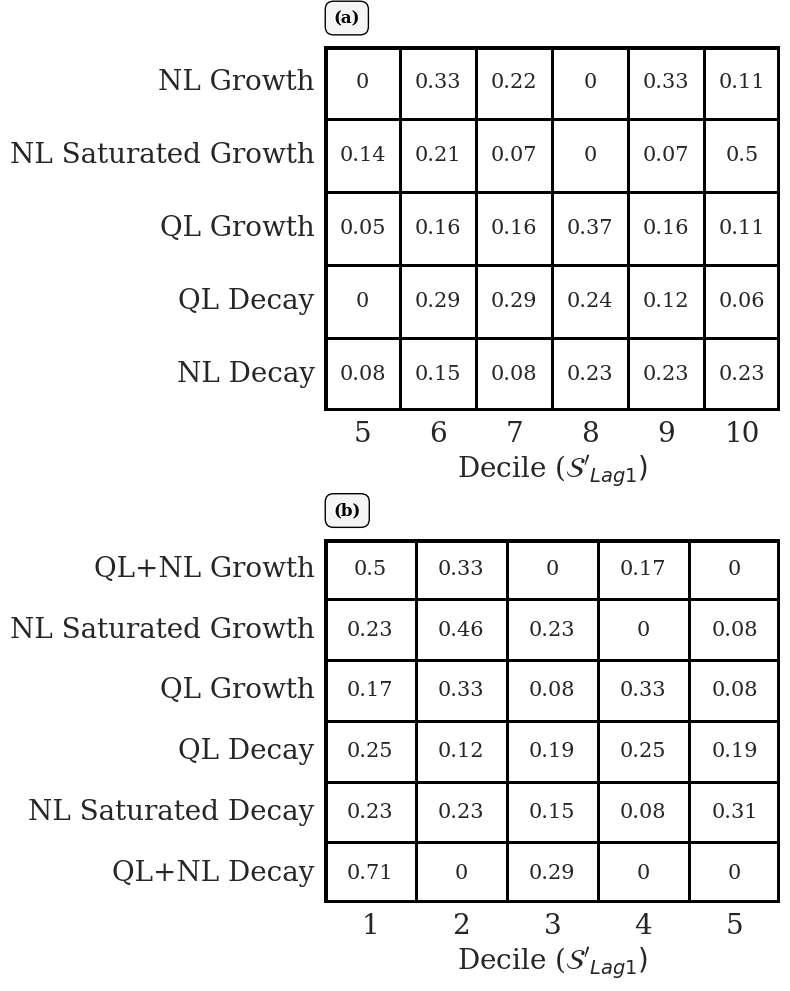

In [212]:
params = {
#     'legend.fontsize': 10,
#           'legend.title_fontsize': 10,
#           'figure.figsize': (15, 5),
         'axes.labelsize':25, # this controls labelsize of both x and y axis of main plot as well as colorbar  
         'axes.titlesize':25, # pot title size
         'xtick.labelsize':20,
         'ytick.labelsize':20, # this controls yticks labelsize of both main plot and colorbar 
#    'lines.markersize': 1,
        'font.family': 'DejaVu Serif', 
}

plt.rcParams.update(params)


fig,ax = plt.subplots(2,1,figsize=(8,10))

sns.heatmap(
    pivoted_df_apr_posbg/100, annot=True, 
    cmap="Greys", 
    vmin=0, vmax=0, 
    linewidths=1, linecolor='k',
    ax=ax[0],
    cbar=False,
#     cbar_kws={'orientation': 'horizontal', 'pad':0.27, 'shrink':0.6},
    annot_kws={"fontsize": 15},
)

ax[0].set_xlabel('Decile ($\mathcal{S}\'_{Lag1})$', fontsize=20)
ax[0].set_ylabel('')
# ax[0].set_yticks(pivoted_df_apr_posbg.index.values, labels = pivoted_df_apr_posbg.index.values, fontsize=10)
labels = range(5, 11)
border_thickness = 5
ax[0].set_xticklabels(labels) # , rotation=0, horizontalalignment='right'
ax[0].add_patch(
    plt.Rectangle((0, 0), pivoted_df_apr_posbg.shape[1], pivoted_df_apr_posbg.shape[0], 
    edgecolor='black', fill=False, lw=border_thickness, 
    transform=ax[0].transData)
)

sns.heatmap(
    pivoted_df_apr_negbg.iloc[[2,0,1,4,3,5],:].rename(
    index={
        'amplif_NLSat_main': 'NL Saturated Growth', 
        'amplif_QL_main': 'QL Growth', 
        'amplif_full_main': 'QL+NL Growth',
        'decay_NLSat_main': 'NL Saturated Decay',
        'decay_QL2_main': 'QL Decay', 
        "decay_full_main": 'QL+NL Decay'})/100, 
    annot=True, 
    cmap='Greys', vmin=0, vmax=0, 
    cbar=False,
    linewidths=1, linecolor='k',
    ax=ax[1],
#     cbar_kws={'orientation': 'horizontal', 'pad':0.27, 'shrink':0.6},
    annot_kws={"fontsize": 15},
)

ax[1].set_xlabel('Decile ($\mathcal{S}\'_{Lag1})$', fontsize=20)
ax[1].set_ylabel('')
# ax[1].set_yticks(pivoted_df_apr_negbg.index.values, labels = pivoted_df_apr_negbg.index.values, fontsize=10)
labels = range(1, 6)
border_thickness = 5
ax[1].set_xticklabels(labels) # , rotation=0, horizontalalignment='right'
ax[1].add_patch(
    plt.Rectangle((0, 0), pivoted_df_apr_negbg.shape[1], pivoted_df_apr_negbg.shape[0], 
    edgecolor='black', fill=False, lw=border_thickness, 
    transform=ax[1].transData)
)

ax[0].text(
    .02, 1.1, '(a)', transform=ax[0].transAxes, 
    fontsize=12, fontname =fontname, 
    verticalalignment='top', c='k', bbox=props, fontweight='bold'
)

ax[1].text(
    .02, 1.1, '(b)', transform=ax[1].transAxes, 
    fontsize=12, fontname =fontname, 
    verticalalignment='top', c='k', bbox=props, fontweight='bold'
)
plt.tight_layout(w_pad=3.5)
plt.savefig("/home/data/lab_hardik/Manuscript1/apr_advregime_prob_tables.pdf",)


In [171]:
pivoted_df_apr_negbg.iloc[[2,0,1,4,3,5],:].rename(
    index={
        'amplif_NLSat_main': 'NL Saturated Growth', 
        'amplif_QL_main': 'QL Growth', 
        'amplif_full_main': 'QL+NL Growth',
        'decay_NLSat_main': 'NL Saturated Decay',
        'decay_QL2_main': 'QL Decay', 
        "decay_full_main": 'QL+NL Decay'})

0     1     2     3     4
regime_cls_2                                     
QL+NL Growth         50.0  33.0   0.0  17.0   0.0
NL Saturated Growth  23.0  46.0  23.0   0.0   8.0
QL Growth            17.0  33.0   8.0  33.0   8.0
QL Decay             25.0  12.0  19.0  25.0  19.0
NL Saturated Decay   23.0  23.0  15.0   8.0  31.0
QL+NL Decay          71.0   0.0  29.0   0.0   0.0

## Welcome to the old world

In [ ]:
ds_brnch = df_prep(dates=flux_dts, sample=np.nan).copy()
ds_brnch

In [ ]:
ds_brnch['ni_dse_anom'] = \
ds_brnch.sel(latitude=slice(24,31), longitude=slice(68,78)).mean(['latitude','longitude'])['dse_anom']

In [ ]:
ds_brnch2 = \
ds_brnch.where(ds_brnch['ni_dse_anom'].compute() < 0, drop=True)

In [ ]:
da_plt = ds_brnch2['dse_anom'].mean(['date']).compute()
da_cont = ds_brnch2['z_anom_10D'].mean(['date']).compute()
da_u = (ds_brnch2['u_anom_10D']).mean(['date']).compute()
da_v = (ds_brnch2['v_anom_10D']).mean(['date']).compute()

In [ ]:
importlib.reload(composite_funcs)
from composite_funcs import *

In [ ]:
plot_composite(        
    da_plt = da_plt, 
    da_cont = da_cont, 
    da_u = da_u, 
    da_v =da_v, 
    xmin=0, xmax=120, ymin=10, ymax=65, 
        cont_divisions=20, coarsen_pts=8,
        t_type = 'dse_anom',scale_quiv= 200, 
#         title_str = 'dse_flx = {}, date = {}'.format(tot_flx, str(df.date.iloc[i].date()))
)

In [ ]:
dts_neut_posGrowth = pd.read_csv(dir_csv + 'Apr_PosGrowth_neutLag1T2m_prim.csv', parse_dates=['date'])
df = dts_neut_posGrowth.copy()

ds_brnch = df_prep(df).copy()

In [ ]:
global fig, ax
num_plots = 10 if df.shape[0]>=10 else df.shape[0]

fig, ax = plt.subplots(int(np.ceil(num_plots/2)),2, figsize=(16,20), 
                       sharey=True, subplot_kw={'projection': ccrs.PlateCarree()})

for i in range(num_plots):
    r = bicol_panel_rownum(i)
    c = bicol_panel_colnum(i)
    print(r)
    print(c)
    
    tot_flx = df.adv_recon.iloc[i].round(0)
    
    da_plt = ds_brnch['dse_anom'].isel(date = i).compute()#.mean(['date']).compute()
    da_cont = ds_brnch['z_anom_10D'].isel(date = i).compute()#.mean(['date']).compute()
    da_u = (ds_brnch['u']).isel(date = i).compute()#.mean(['date']).compute()
    da_v = (ds_brnch['v']).isel(date = i).compute()#.mean(['date']).compute()
    # da_u = ds_brnch['adv_flx_x'].mean(['date']).compute()
    # da_v = ds_brnch['adv_flx_y'].mean(['date']).compute()

    # vmin = np.nan; vmax=np.nan
    inner_plot_composite(
        da_plt = da_plt, da_cont = da_cont, da_u = da_u, da_v =da_v, xmin=0, xmax=120, ymin=10, ymax=65, 
        cont_divisions=20, coarsen_pts=8,
        t_type = 'dse_anom',scale_quiv= 70, 
        i = r, j = c, ax=ax[r,c], 
        title_str = 'dse_flx = {}, date = {}'.format(tot_flx, str(df.date.iloc[i].date()))
        )
plt.tight_layout()


In [ ]:
global fig, ax
num_plots = 10 if df.shape[0]>=10 else df.shape[0]

fig, ax = plt.subplots(int(np.ceil(num_plots/2)),2, figsize=(16,20), 
                       sharey=True, subplot_kw={'projection': ccrs.PlateCarree()})

for i in range(num_plots):
    r = bicol_panel_rownum(i)
    c = bicol_panel_colnum(i)
    print(r)
    print(c)
    
    tot_flx = df.adv_recon.iloc[i].round(0)
    
    da_plt = ds_brnch['dse_anom'].isel(date = i).compute()#.mean(['date']).compute()
    da_cont = ds_brnch['z_anom_10D'].isel(date = i).compute()#.mean(['date']).compute()
    da_u = (ds_brnch['u_anom_10D']).isel(date = i).compute()#.mean(['date']).compute()
    da_v = (ds_brnch['v_anom_10D']).isel(date = i).compute()#.mean(['date']).compute()
    # da_u = ds_brnch['adv_flx_x'].mean(['date']).compute()
    # da_v = ds_brnch['adv_flx_y'].mean(['date']).compute()

    # vmin = np.nan; vmax=np.nan
    inner_plot_composite(
        da_plt = da_plt, da_cont = da_cont, da_u = da_u, da_v =da_v, xmin=0, xmax=120, ymin=10, ymax=65, 
        cont_divisions=20, coarsen_pts=8,
        t_type = 'dse_anom',scale_quiv= 70, 
        i = r, j = c, ax=ax[r,c], 
        title_str = 'dse_flx = {}, date = {}'.format(tot_flx, str(df.date.iloc[i].date()))
        )
plt.tight_layout()


In [ ]:
dts_neut_posGrowth_Lag1_adv = pd.read_csv(dir_csv + 'Apr_PosGrowth_neutLag1T2m_Lag1_advrecon.csv', parse_dates=['date'])
df = dts_neut_posGrowth_Lag1_adv.copy()
df['date'] = df['date'].shift(1)

ds_brnch = df_prep(df).copy()

In [ ]:
global fig, ax
num_plots = 10 if df.shape[0]>=10 else df.shape[0]

fig, ax = plt.subplots(int(np.ceil(num_plots/2)),2, figsize=(16,20), 
                       sharey=True, subplot_kw={'projection': ccrs.PlateCarree()})

for i in range(num_plots):
    r = bicol_panel_rownum(i)
    c = bicol_panel_colnum(i)
    print(r)
    print(c)
    
    tot_flx = df.adv_recon_Lag1.iloc[i].round(0)
    
    da_plt = ds_brnch['dse_anom'].isel(date = i).compute()#.mean(['date']).compute()
    da_cont = ds_brnch['z_anom_10D'].isel(date = i).compute()#.mean(['date']).compute()
    da_u = (ds_brnch['u_anom_10D']*ds_brnch['dse']).isel(date = i).compute()#.mean(['date']).compute()
    da_v = (ds_brnch['v_anom_10D']*(ds_brnch['dse'])).isel(date = i).compute()#.mean(['date']).compute()
    # da_u = ds_brnch['adv_flx_x'].mean(['date']).compute()
    # da_v = ds_brnch['adv_flx_y'].mean(['date']).compute()

    # vmin = np.nan; vmax=np.nan
    inner_plot_composite(
        da_plt = da_plt, da_cont = da_cont, da_u = da_u, da_v =da_v, xmin=0, xmax=120, ymin=10, ymax=65, 
        cont_divisions=20, coarsen_pts=8,
        t_type = 'dse_anom',scale_quiv= 70, 
        i = r, j = c, ax=ax[r,c], 
        title_str = 'dse_flx = {}, date = {}'.format(tot_flx, str(df.date.iloc[i].date()))
        )
plt.tight_layout()


In [ ]:
global fig, ax
num_plots = 10 if df.shape[0]>=10 else df.shape[0]

fig, ax = plt.subplots(int(np.ceil(num_plots/2)),2, figsize=(16,20), 
                       sharey=True, subplot_kw={'projection': ccrs.PlateCarree()})

for i in range(num_plots):
    r = bicol_panel_rownum(i)
    c = bicol_panel_colnum(i)
    print(r)
    print(c)
    
    tot_flx = df.adv_recon_Lag1.iloc[i].round(0)
    
    da_plt = ds_brnch['dse_anom'].isel(date = i).compute()#.mean(['date']).compute()
    da_cont = ds_brnch['z_anom_10D'].isel(date = i).compute()#.mean(['date']).compute()
    da_u = (ds_brnch['u']*ds_brnch['dse']).isel(date = i).compute()#.mean(['date']).compute()
    da_v = (ds_brnch['v']*(ds_brnch['dse'])).isel(date = i).compute()#.mean(['date']).compute()
    # da_u = ds_brnch['adv_flx_x'].mean(['date']).compute()
    # da_v = ds_brnch['adv_flx_y'].mean(['date']).compute()

    # vmin = np.nan; vmax=np.nan
    inner_plot_composite(
        da_plt = da_plt, da_cont = da_cont, da_u = da_u, da_v =da_v, xmin=0, xmax=120, ymin=10, ymax=65, 
        cont_divisions=20, coarsen_pts=8,
        t_type = 'dse_anom',scale_quiv= 70, 
        i = r, j = c, ax=ax[r,c], 
        title_str = 'dse_flx = {}, date = {}'.format(tot_flx, str(df.date.iloc[i].date()))
        )
plt.tight_layout()


In [ ]:
1

In [ ]:
df = dts_posExt_us.copy()

ds_brnch = df_prep(df).copy()

In [ ]:
ds_brnch

In [ ]:
global fig, ax
num_plots = 10 if df.shape[0]>=10 else df.shape[0]

fig, ax = plt.subplots(int(np.ceil(num_plots/2)),2, figsize=(16,20), 
                       sharey=True, subplot_kw={'projection': ccrs.PlateCarree()})

for i in range(num_plots):
    r = bicol_panel_rownum(i)
    c = bicol_panel_colnum(i)
    print(r)
    print(c)
    
    tot_flx = df.adv_recon.iloc[i].round(0)
    
    da_plt = ds_brnch['dse_anom'].isel(date = i).compute()#.mean(['date']).compute()
    da_cont = ds_brnch['z_anom_10D'].isel(date = i).compute()#.mean(['date']).compute()
    da_u = (ds_brnch['u']*ds_brnch['dse']).isel(date = i).compute()#.mean(['date']).compute()
    da_v = (ds_brnch['v']*(ds_brnch['dse'])).isel(date = i).compute()#.mean(['date']).compute()
    # da_u = ds_brnch['adv_flx_x'].mean(['date']).compute()
    # da_v = ds_brnch['adv_flx_y'].mean(['date']).compute()

    # vmin = np.nan; vmax=np.nan
    inner_plot_composite(
        da_plt = da_plt, da_cont = da_cont, da_u = da_u, da_v =da_v, xmin=0, xmax=120, ymin=10, ymax=65, 
        cont_divisions=20, coarsen_pts=8,
        t_type = 'dse_anom',scale_quiv= 70, 
        i = r, j = c, ax=ax[r,c], 
        title_str = 'dse_flx = {}, date = {}'.format(tot_flx, str(df.date.iloc[i].date()))
        )
plt.tight_layout()


In [ ]:
df = df.drop('date.1', axis=1)['date'].astype('datetime64[ns]').to_frame()

In [ ]:
ds_brnch.dims

In [ ]:
ds_brnch.dims['date']

In [196]:
ds_brnch

<xarray.Dataset>
Dimensions:        (date: 17, latitude: 201, longitude: 481)
Coordinates:
  * latitude       (latitude) float64 10.0 10.25 10.5 10.75 ... 59.5 59.75 60.0
  * longitude      (longitude) float64 0.0 0.25 0.5 0.75 ... 119.5 119.8 120.0
  * date           (date) datetime64[ns] 1982-04-04 1984-04-20 ... 2021-04-07
Data variables:
    u              (date, latitude, longitude) float64 dask.array<chunksize=(1, 201, 481), meta=np.ndarray>
    v              (date, latitude, longitude) float64 dask.array<chunksize=(1, 201, 481), meta=np.ndarray>
    u_anom_10D     (date, latitude, longitude) float64 dask.array<chunksize=(1, 201, 481), meta=np.ndarray>
    v_anom_10D     (date, latitude, longitude) float64 dask.array<chunksize=(1, 201, 481), meta=np.ndarray>
    z_anom_10D     (date, latitude, longitude) float64 dask.array<chunksize=(1, 201, 481), meta=np.ndarray>
    dse_anom       (date, latitude, longitude) float64 dask.array<chunksize=(1, 201, 481), meta=np.ndarray>
    dse_anom_Lag1  (date, latitude, longitude) float64 dask.array<chunksize=(1, 201, 481), meta=np.ndarray>

In [ ]:
-

In [ ]:
global fig, ax
num_plots = 10 if ds_brnch.dims['date']>=10 else ds_brnch.dims['date']

fig, ax = plt.subplots(int(np.ceil(num_plots/2)),2, figsize=(16,20), 
                       sharey=True, subplot_kw={'projection': ccrs.PlateCarree()})

for i in range(num_plots):
    r = bicol_panel_rownum(i)
    c = bicol_panel_colnum(i)
    print(r)
    print(c)
    
    tot_flx = df.adv_recon.iloc[i].round(0)
    
    da_plt = ds_brnch['dse_anom'].isel(date = i).compute()#.mean(['date']).compute()
    da_cont = ds_brnch['z_anom_10D'].isel(date = i).compute()#.mean(['date']).compute()
    da_u = ds_brnch['u'].isel(date = i).compute()#.mean(['date']).compute()
    da_v = ds_brnch['v'].isel(date = i).compute()#.mean(['date']).compute()
    # da_u = ds_brnch['adv_flx_x'].mean(['date']).compute()
    # da_v = ds_brnch['adv_flx_y'].mean(['date']).compute()

    # vmin = np.nan; vmax=np.nan
    inner_plot_composite(
        da_plt = da_plt, da_cont = da_cont, da_u = da_u, da_v =da_v, 
        xmin=0, xmax=120, ymin=10, ymax=65, 
        cont_divisions=20, coarsen_pts=8, 
        t_type = 'dse_anom',scale_quiv= 70, 
        i = r, j = c, 
        ax=ax[r,c], 
        title_str = 'dse_flx = {}, date = {}'.format(tot_flx, str(df.date.iloc[i].date()))
        )
plt.tight_layout()


In [ ]:
dts_3 = pd.read_csv('Dates_Apr_LargePosTprim_SmallPosT3.csv', parse_dates=['date'])

df=dts_3
df.columns

In [ ]:
ds_brnch3 = df_prep(df).copy()

In [ ]:
global fig, ax
num_plots = 10 if df.shape[0]>=10 else df.shape[0]

fig, ax = plt.subplots(int(np.ceil(num_plots/2)),2, figsize=(16,20), 
                       sharey=True, subplot_kw={'projection': ccrs.PlateCarree()})

for i in range(num_plots):
    r = bicol_panel_rownum(i)
    c = bicol_panel_colnum(i)
    print(r)
    print(c)
    
    tot_flx = df.adv_recon.iloc[i].round(0)
    
    da_plt = ds_brnch3['dse_anom'].isel(date = i).compute()#.mean(['date']).compute()
    da_cont = ds_brnch3['z_anom_10D'].isel(date = i).compute()#.mean(['date']).compute()
    da_u = ds_brnch3['u'].isel(date = i).compute()#.mean(['date']).compute()
    da_v = ds_brnch3['v'].isel(date = i).compute()#.mean(['date']).compute()
    # da_u = ds_brnch3['adv_flx_x'].mean(['date']).compute()
    # da_v = ds_brnch3['adv_flx_y'].mean(['date']).compute()

    # vmin = np.nan; vmax=np.nan
    inner_plot_composite(
        da_plt = da_plt, da_cont = da_cont, da_u = da_u, da_v =da_v, xmin=0, xmax=120, ymin=10, ymax=65, 
        cont_divisions=20, coarsen_pts=8,
        t_type = 'dse_anom',scale_quiv= 70, 
        i = r, j = c, ax=ax[r,c], 
        title_str = 'dse_flx = {}, date = {}'.format(tot_flx, str(df.date.iloc[i].date()))
        )
plt.tight_layout()


In [ ]:
path_dates_movie(
    ds = ds_brnch, # .isel(date = slice(0,4)), 
    path_desc = 'LT_DSE_Flx_Vects_DSE\'_Colors', 
    mon_str = 'apr_pos_ext', 
    xmin=0, xmax=120, ymin=5, ymax=50,
    cont_min=-1500, cont_max=1500, cont_spacing=100,
    u_field = 'adv_flx_x', 
    v_field = 'adv_flx_y',
    t_field = 'dse_anom',
    dir_data = '/home/data/lab_hardik/heatwaves/ERA5/analyses/EDA/movies/'
)
